In [1]:
# import libraries 
library(ggplot2)
library(tidyr)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [32]:
# enlarging resulting plots
options(repr.plot.width=25, repr.plot.height=10)

# The Fangs of Immunity: Resilience of the Shark Immune System

In [3]:
sharks = read.table("datasets/shark_immunity.txt", header = TRUE, sep = "\t")

## Understanding the Dataset

### Overview of the Dataset

In [4]:
sprintf("%d entries, %d categories", nrow(sharks), ncol(sharks)-1)
names(sharks)

[1] "1345 entries, 17 categories"

[1] "ID"                        "physiological_condition"  
 [3] "immune_cell_type"          "Gene_A_expression"        
 [5] "Gene_B_expression"         "Gene_C_expression"        
 [7] "Gene_D_expression"         "Gene_E_expression"        
 [9] "Gene_F_expression"         "regeneration_capacity"    
[11] "age_years"                 "immune_receptor_diversity"
[13] "response_to_infection"     "inflammation_level"       
[15] "weight_kg"                 "habitat_location"         
[17] "resilience_score"          "reproduction_rate"

Values for Qualitative Categories

In [5]:
unique(sharks$physiological_condition)
unique(sharks$immune_cell_type)
unique(sharks$habitat_location)

[1] "Infected"   "Injured"    "Healthy"    "Stressed"   "Recovering"

[1] "Monocytes"       "Dendritic_cells" "T_cells"         "NK_cells"       
[5] "B_cells"         "Macrophages"

[1] "Indian"   "Southern" "Arctic"   "Pacific"  "Atlantic"

### Overview of Each Category

In [6]:
table(sharks$physiological_condition)


   Healthy   Infected    Injured Recovering   Stressed 
       387        333        271        153        201 

In [7]:
table(sharks$immune_cell_type)


        B_cells Dendritic_cells     Macrophages       Monocytes        NK_cells 
            284             155             139             187             256 
        T_cells 
            324 

In [8]:
summary(sharks[4:9])

 Gene_A_expression Gene_B_expression Gene_C_expression Gene_D_expression
 Min.   : 45.20    Min.   : 32.75    Min.   : 67.05    Min.   : 42.13   
 1st Qu.: 78.16    1st Qu.: 75.73    1st Qu.: 97.93    1st Qu.: 83.62   
 Median : 96.29    Median :106.06    Median :109.63    Median :101.09   
 Mean   :102.87    Mean   :110.53    Mean   :119.42    Mean   :110.17   
 3rd Qu.:126.66    3rd Qu.:134.58    3rd Qu.:139.72    3rd Qu.:131.79   
 Max.   :175.39    Max.   :194.24    Max.   :191.41    Max.   :194.71   
 Gene_E_expression Gene_F_expression
 Min.   : 69.62    Min.   : 50.17   
 1st Qu.:104.80    1st Qu.: 88.10   
 Median :127.16    Median :109.16   
 Mean   :135.18    Mean   :125.73   
 3rd Qu.:167.90    3rd Qu.:168.12   
 Max.   :211.41    Max.   :218.87   

| Gene | Min | Mean | Max |
| :-: | :-: | :-: | :-: |
| A | 45.20 | 96.29 | 175.39 |
| B | 32.75 | 110.53 | 194.24 |
| C | 67.05 | 119.42 | 191.41 |
| D | 42.13 | 110.17 | 194.71 |
| E | 69.62 | 135.18 | 211.41 |
| F | 50.17 | 125.73 | 218.87 |

see the expression level for...
- each immune cell type
- physiological condition
- an immune cell type in a physiological condition

In [9]:
summary(sharks$regeneration_capacity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   83.2   110.3   119.9   119.0   128.0   151.9 

In [10]:
summary(sharks$age_years)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   19.00   33.00   32.91   47.00   60.00 

In [11]:
summary(sharks$immune_receptor_diversity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.9    63.2    73.5    73.4    82.3   102.7 

In [12]:
summary(sharks$response_to_infection)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  40.20   68.60   76.80   77.85   86.30  118.30 

In [13]:
summary(sharks$inflammation_level)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.80   22.90   26.10   35.97   30.90  122.90 

In [14]:
summary(sharks$weight_kg)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  276.2   455.7   497.0   498.1   541.3   679.7 

In [15]:
table(sharks$habitat_location)


  Arctic Atlantic   Indian  Pacific Southern 
     263      278      291      257      256 

In [16]:
summary(sharks$resilience_score)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   98.9   118.7   126.9   128.6   136.6   174.1 

In [17]:
summary(sharks$reproduction_rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.90   10.90   12.30   14.86   20.90   25.00 

### Possible Initial Strategy 

1. find relationship (if there is one) between the physiological condition, immune cell type, and gene expression
    - composition of immune cell types for each physiological condition
    - gene expressions for each immune cell type
    - gene expressions for each physiological condition
    - gene expressions for each immune cell type for a physiological condition
2. find relationship between each numerical category and the main 3 categories 

## Analysis

### Relationship Between Physiological Conditions, Immune Cell Types, Gene Expressions

#### Immune Cell Type Composition for Physiological Conditions

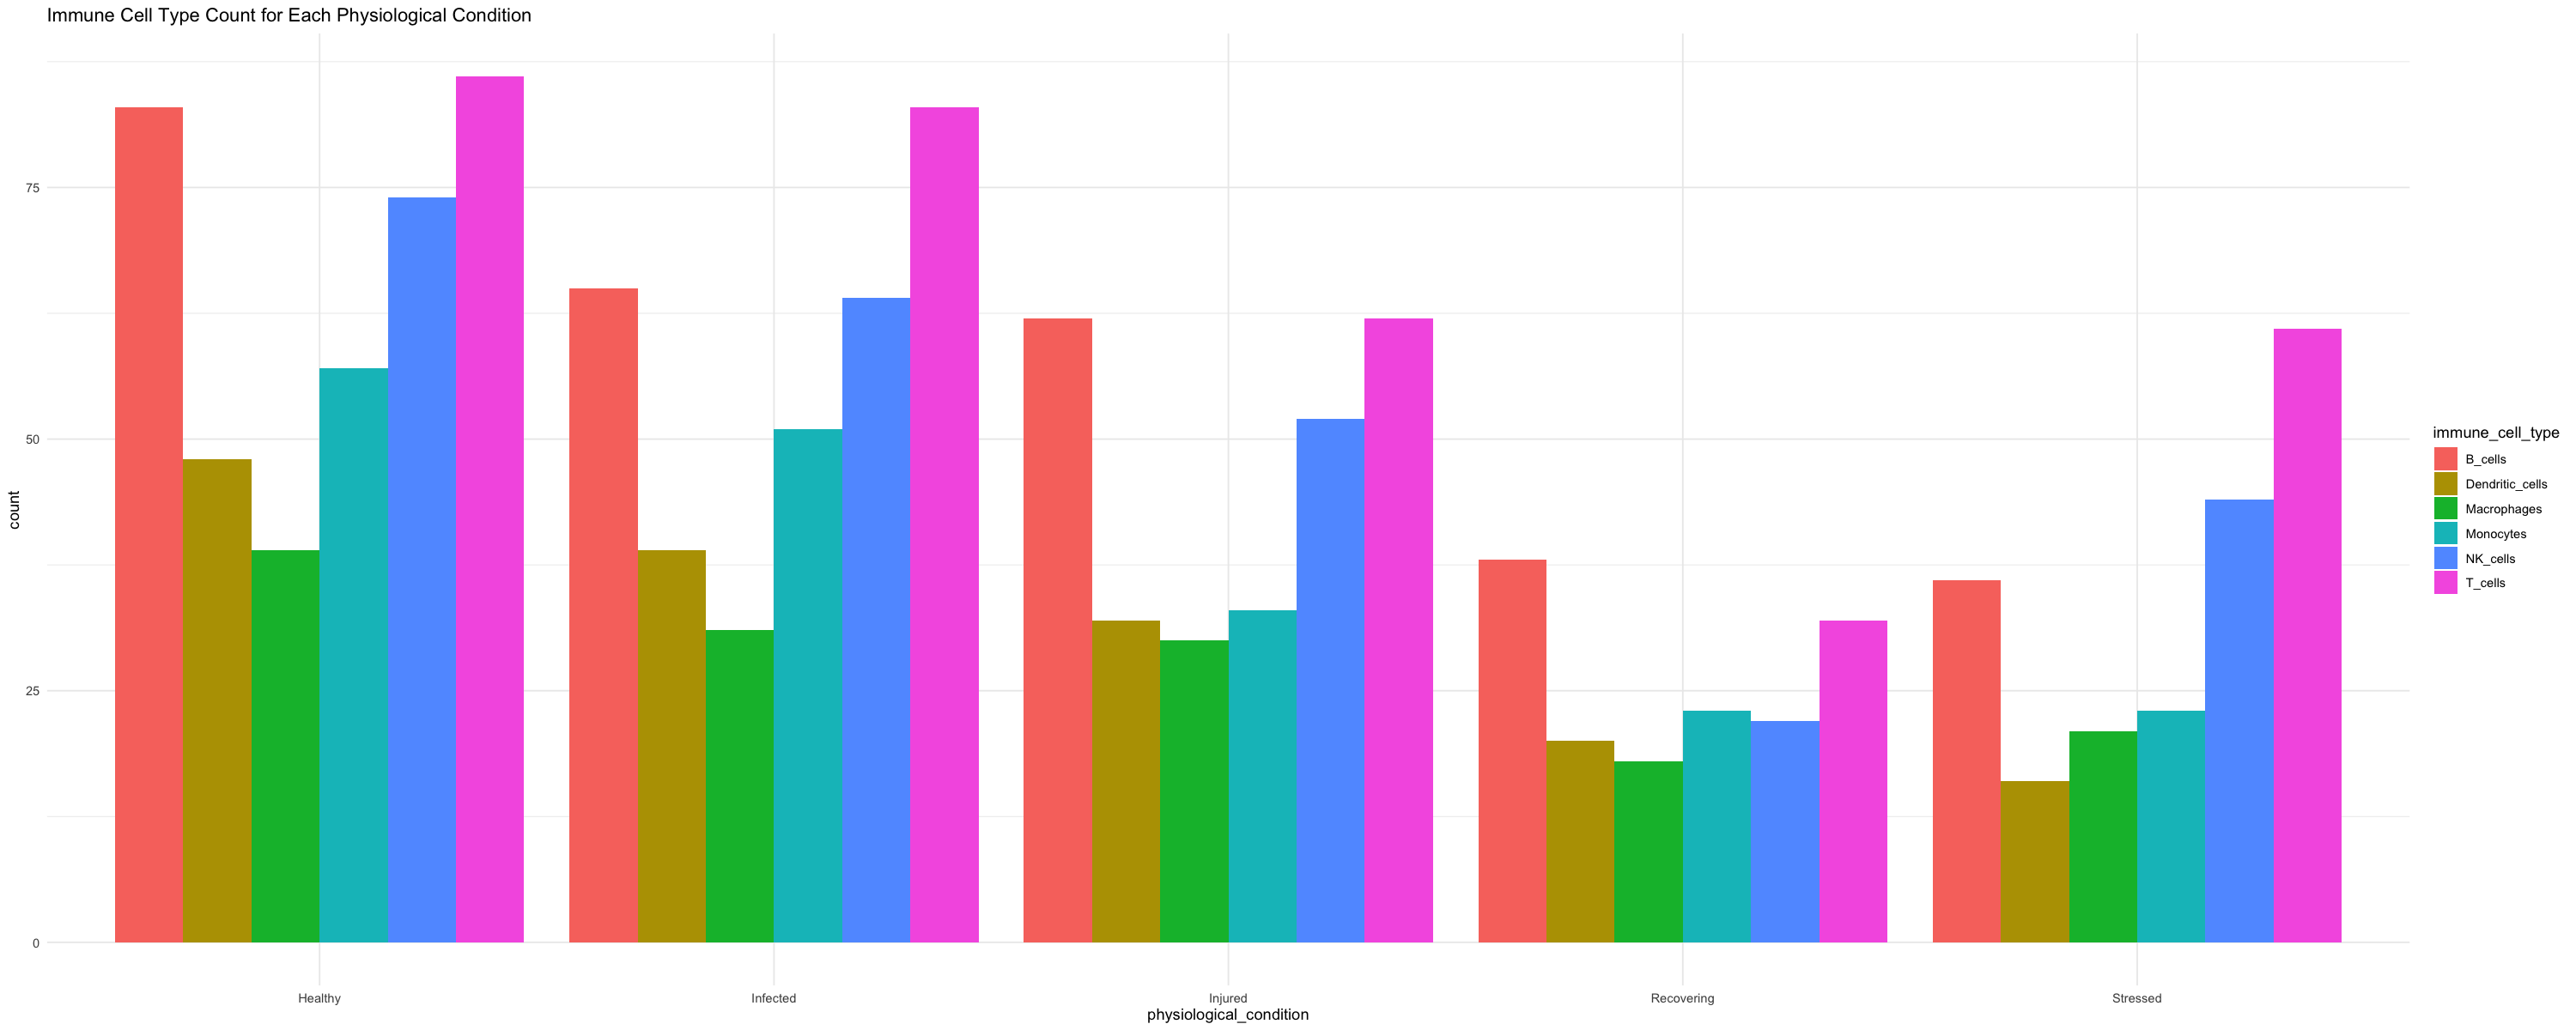

In [18]:
ggplot(sharks, aes(x=physiological_condition, fill=immune_cell_type)) +
    geom_bar(position="dodge") +
    theme_minimal() +
    ggtitle("Immune Cell Type Count for Each Physiological Condition")

Finding the percentage of each cell type for each physiological condition would give us the cell type composition for that condition. The different compositions might allow us to determine which cell type and in what quantities distinguish one physiological condition from another.

Additionally, getting the cell type composition allows us to normalize the cell counts.

_Notice below how the total number of cells for every physiological condition is less than the total for the healthy condition._

In [19]:
# get the cell counts for each cell type for each physiological condition
cell_counts = sharks %>% 
    count(physiological_condition, immune_cell_type)

# get the total cell count for each physiological condition
total_cell_counts = cell_counts %>%
    group_by(physiological_condition) %>%
    summarise(total_nb = sum(n, na.rm = TRUE))
total_cell_counts

physiological_condition,total_nb
<chr>,<int>
Healthy,387
Infected,333
Injured,271
Recovering,153
Stressed,201


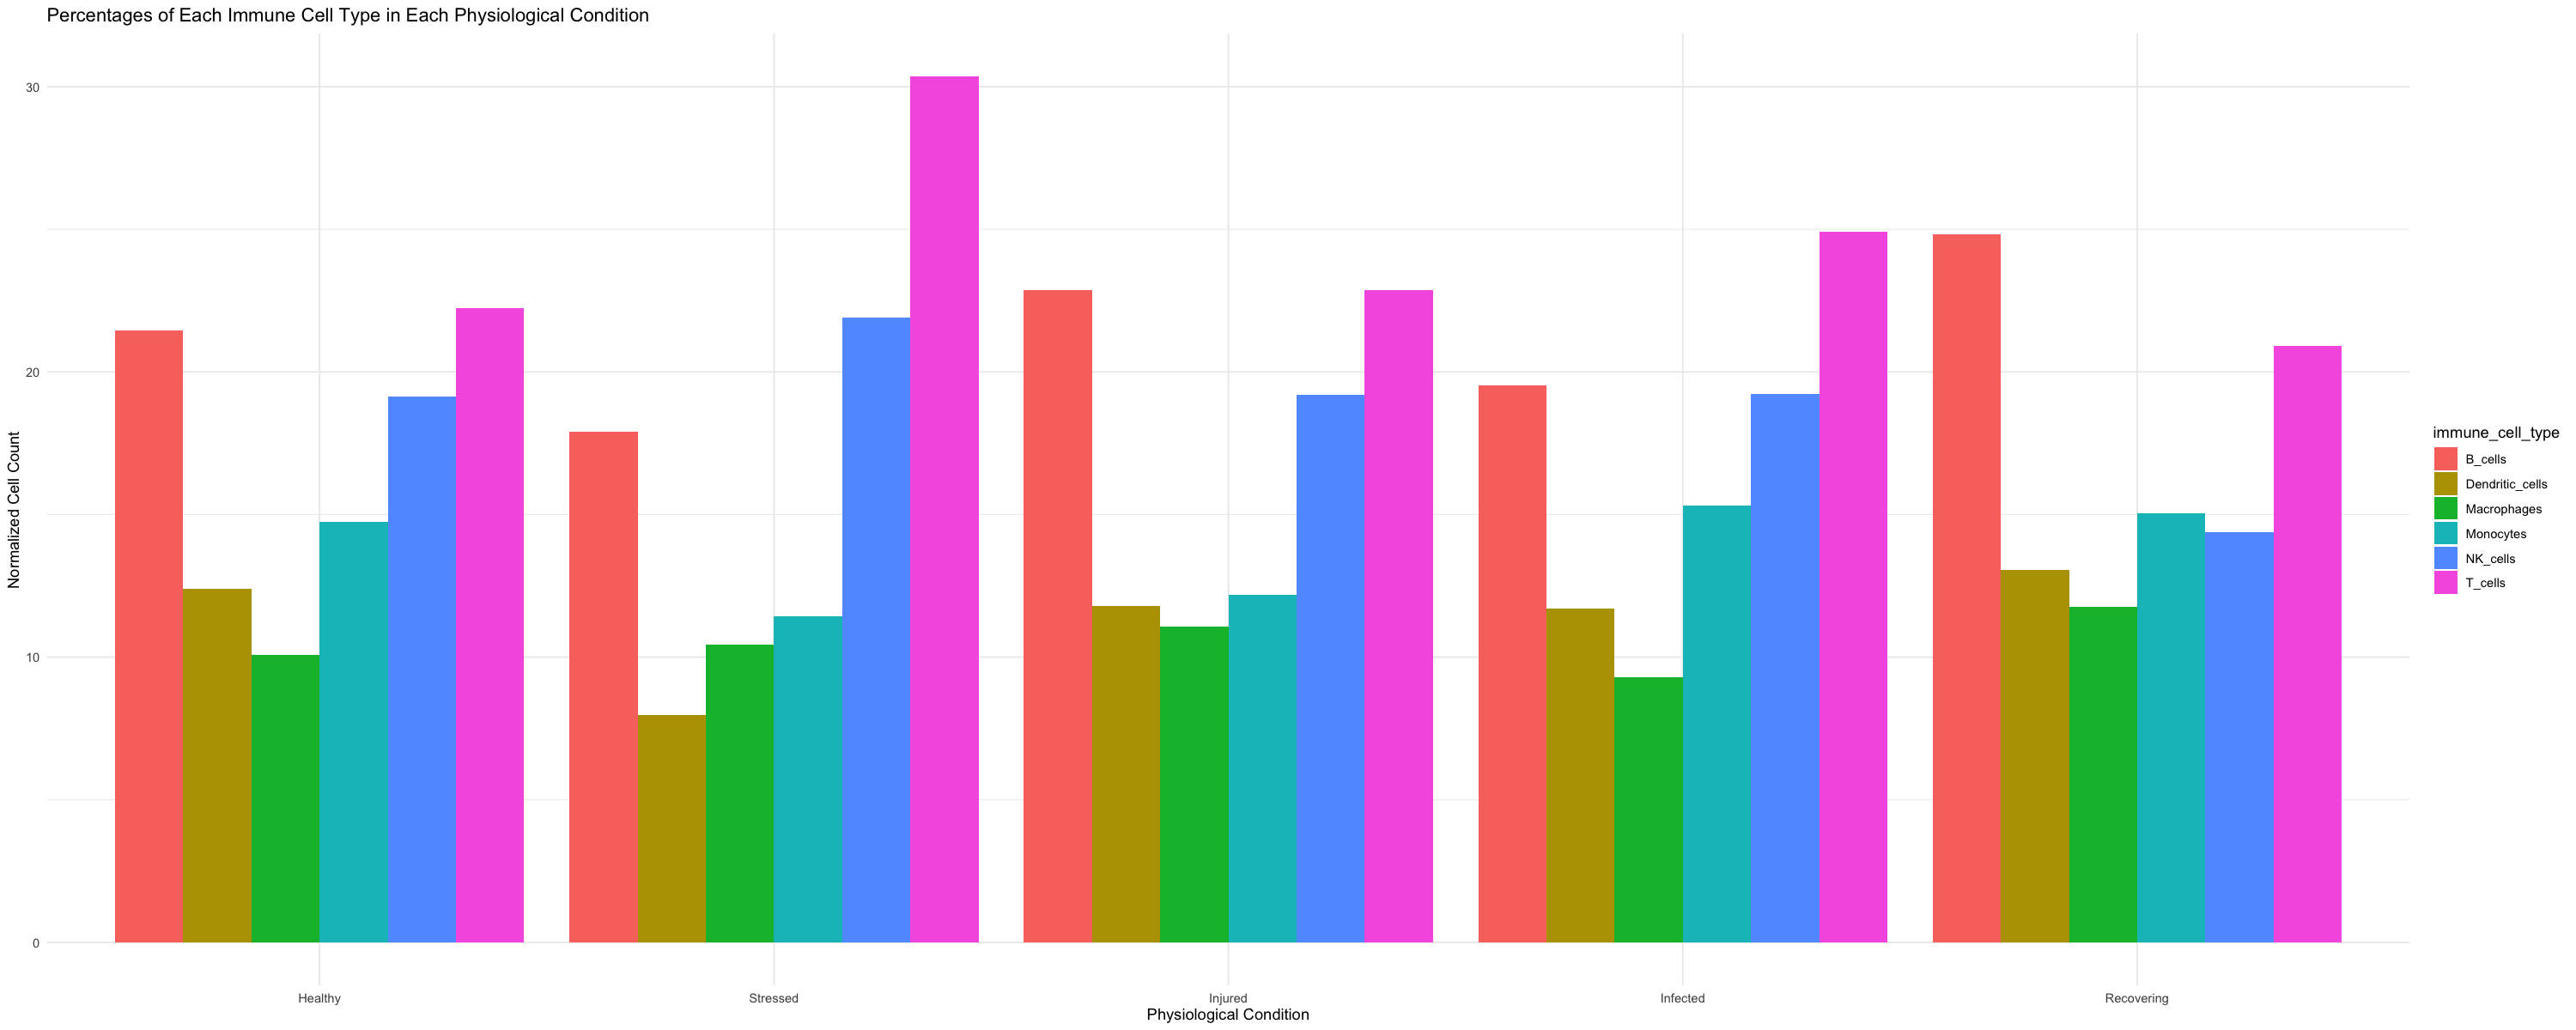

In [20]:
# get percentage of each cell type for each physiological condition
cell_type_percentages = cell_counts %>% 
    left_join(total_cell_counts, by="physiological_condition") %>%
    mutate(percent = 100 * n / total_nb)

# change order of physiological conditions on the x-axis 
cell_type_percentages$physiological_condition <- factor(
  cell_type_percentages$physiological_condition,
  levels = c("Healthy", "Stressed", "Injured", "Infected", "Recovering")
)

# plot percentages (side by side)
ggplot(cell_type_percentages, aes(x=physiological_condition, y=percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    ggtitle("Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count")

Now that we have the cell type composition for each physiological condition, we can normalize them by the healthy condition. Comparing them to the healthy condition, the control in this case, will reveal the possible determining differences, whether they be an increase or a decrease in quantity.

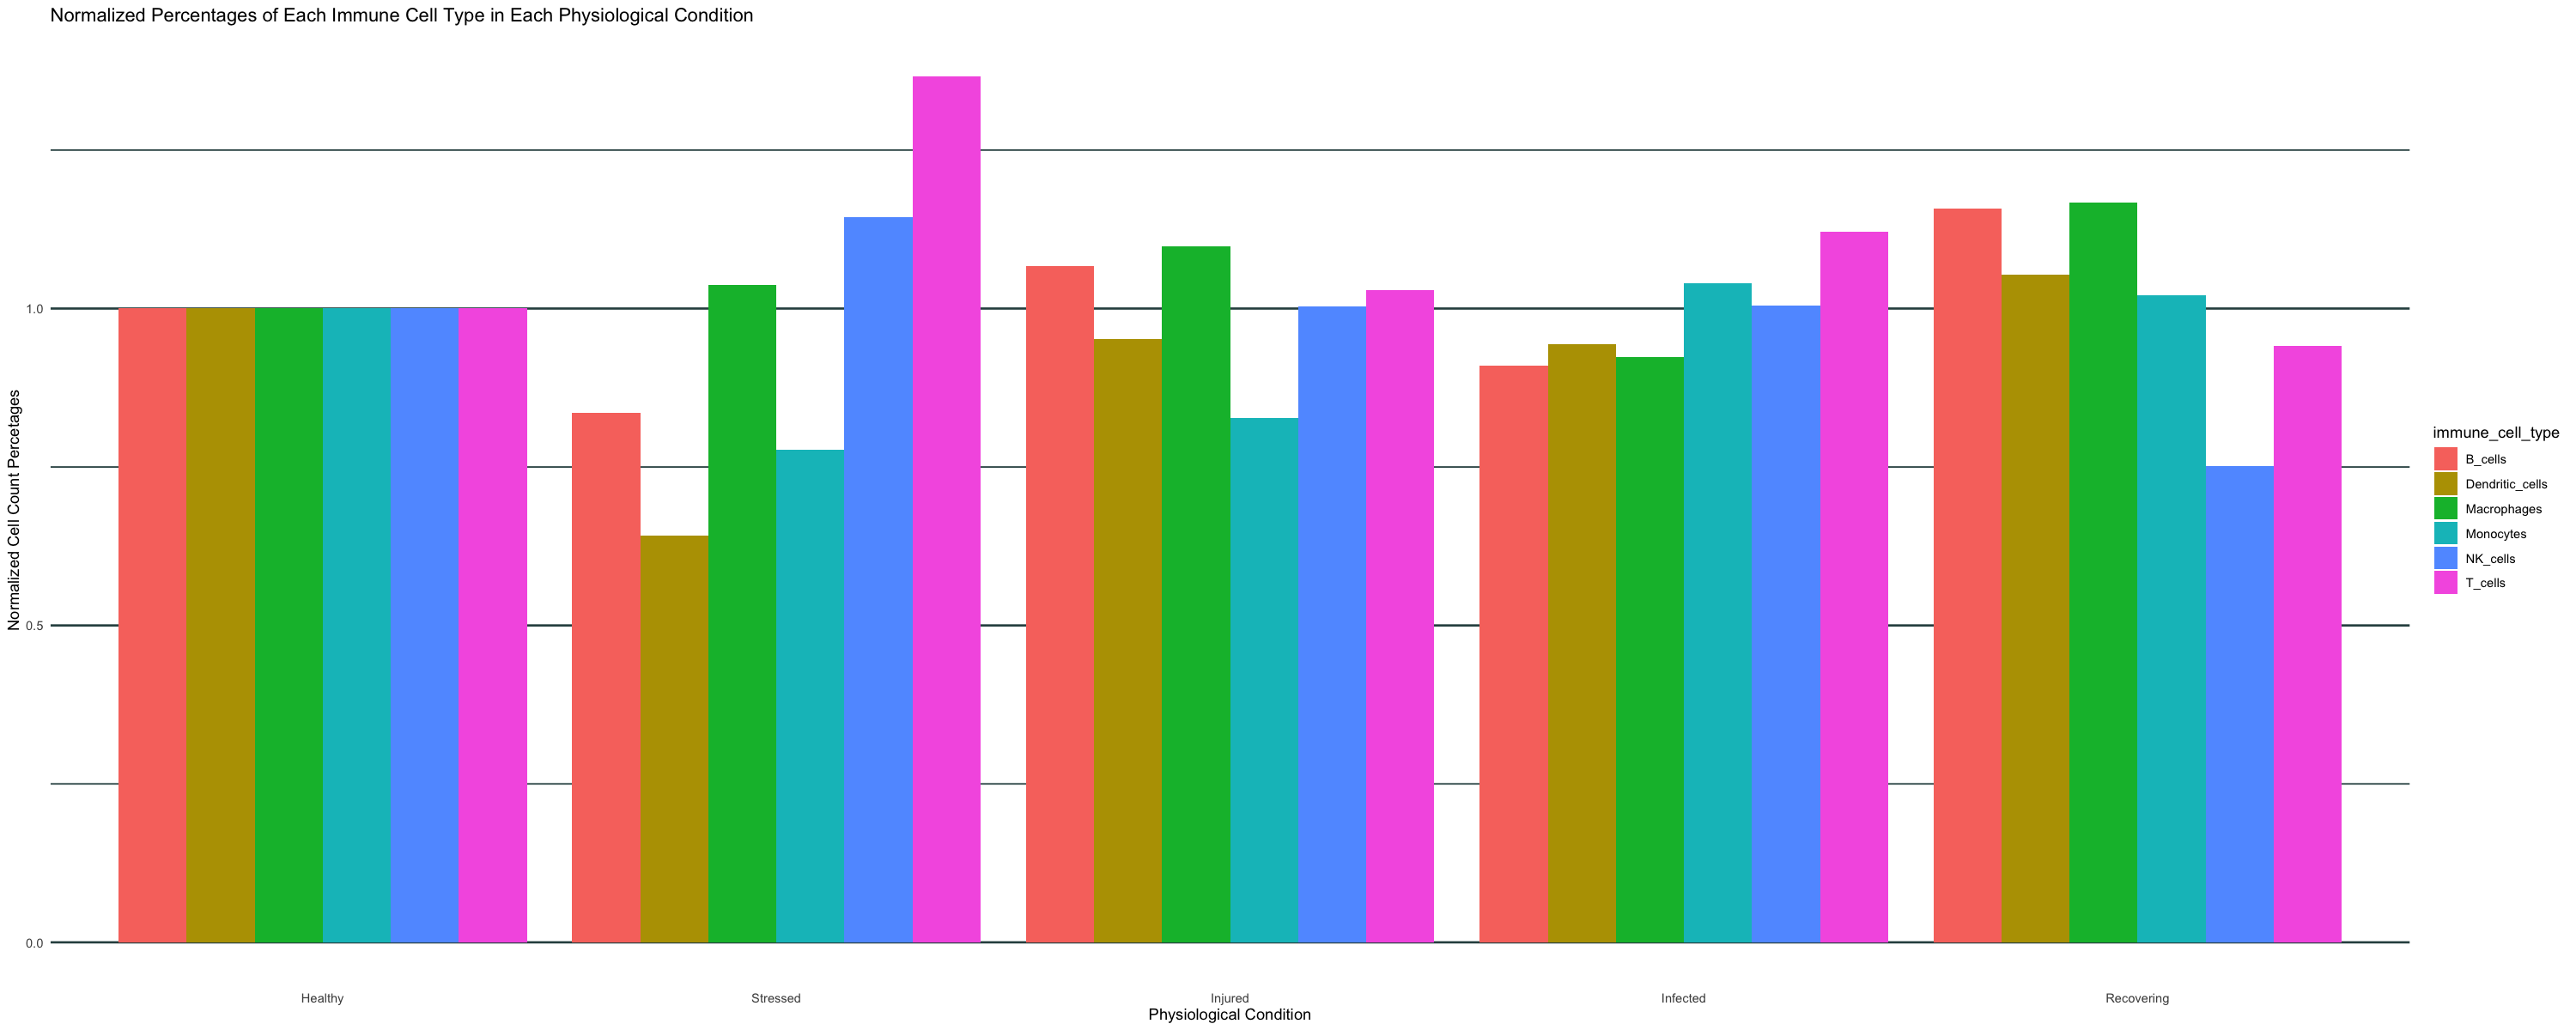

In [59]:
# normalize percentages
norm_cell_type_percentages = cell_type_percentages %>%
    group_by(immune_cell_type) %>%
    mutate(norm_percent = percent/percent[physiological_condition == "Healthy"])

# plot normalized percentages (side by side)
ggplot(norm_cell_type_percentages, aes(x=physiological_condition, y=norm_percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    theme(
        panel.grid.major.y=element_line(color="darkslategray", size=0.75),
        panel.grid.minor.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count Percetages")

Apparent Variations 
| Condition | B Cells | Dendritic Cells | Macrophages | Monocytes | NK Cells | T Cells |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Stressed | -- | --- | + | -- | + | +++ |
| Injured | + | - | + | - | = | + |
| Infected | - | - | - | + | = | + |
| Recovering | + | + | + | + | -- | - |

Interestingly, it seems that the stressed condition has the greatest apparent variation in quantities compared to the healthy condition. Additionally, it also seems that the percentage of NK Cells does not change from the healthy condition to the injured or infected conditions.

Perhaps logically, the recovering condition's values seem to vary in directions opposite to the other conditions' variations.

#### Gene Expression for Physiological Conditions and Immune Cell Types

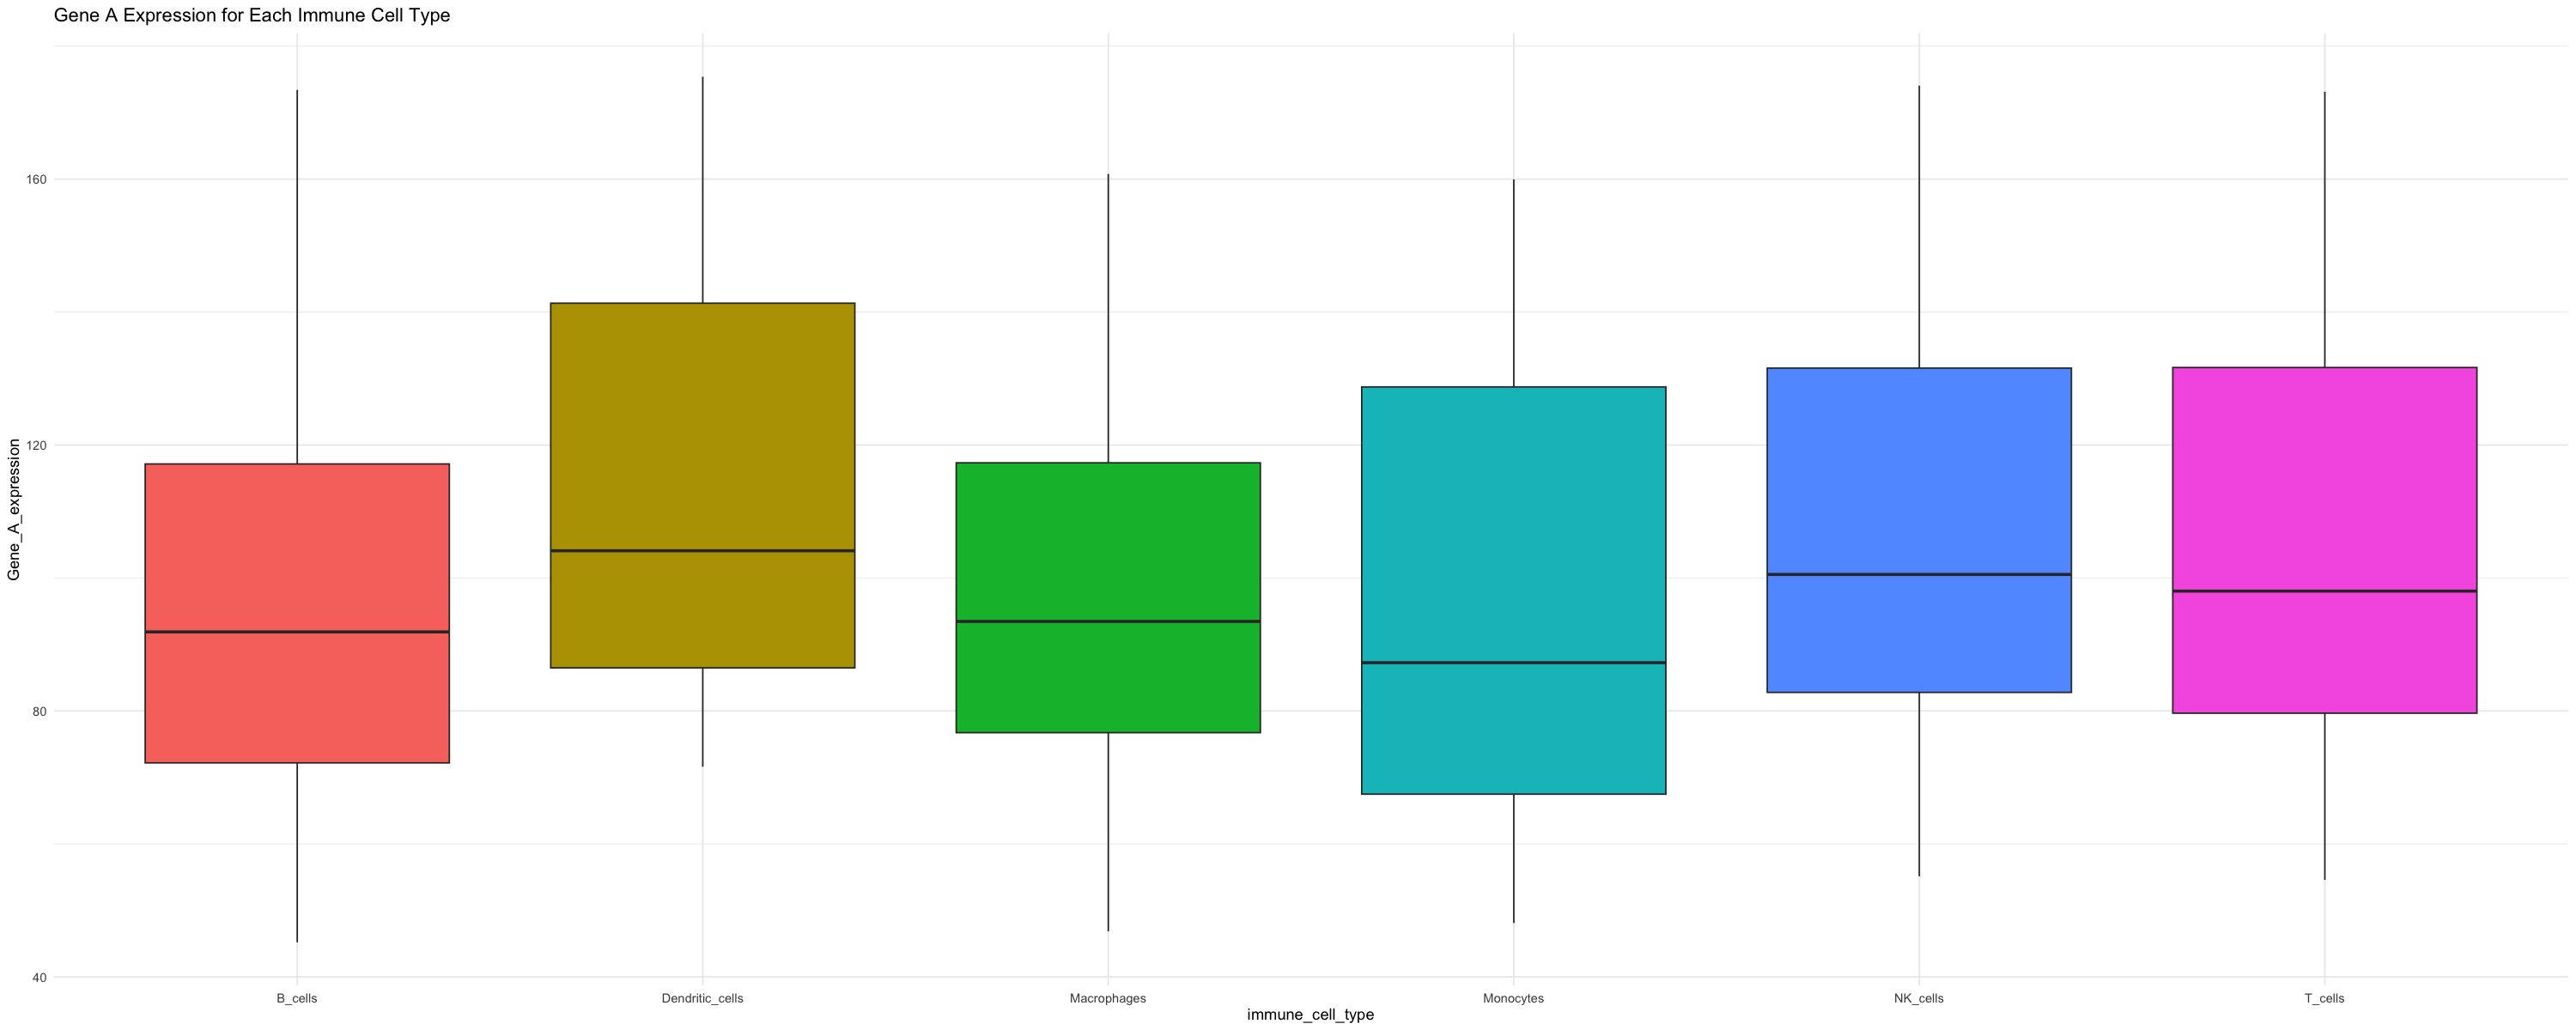

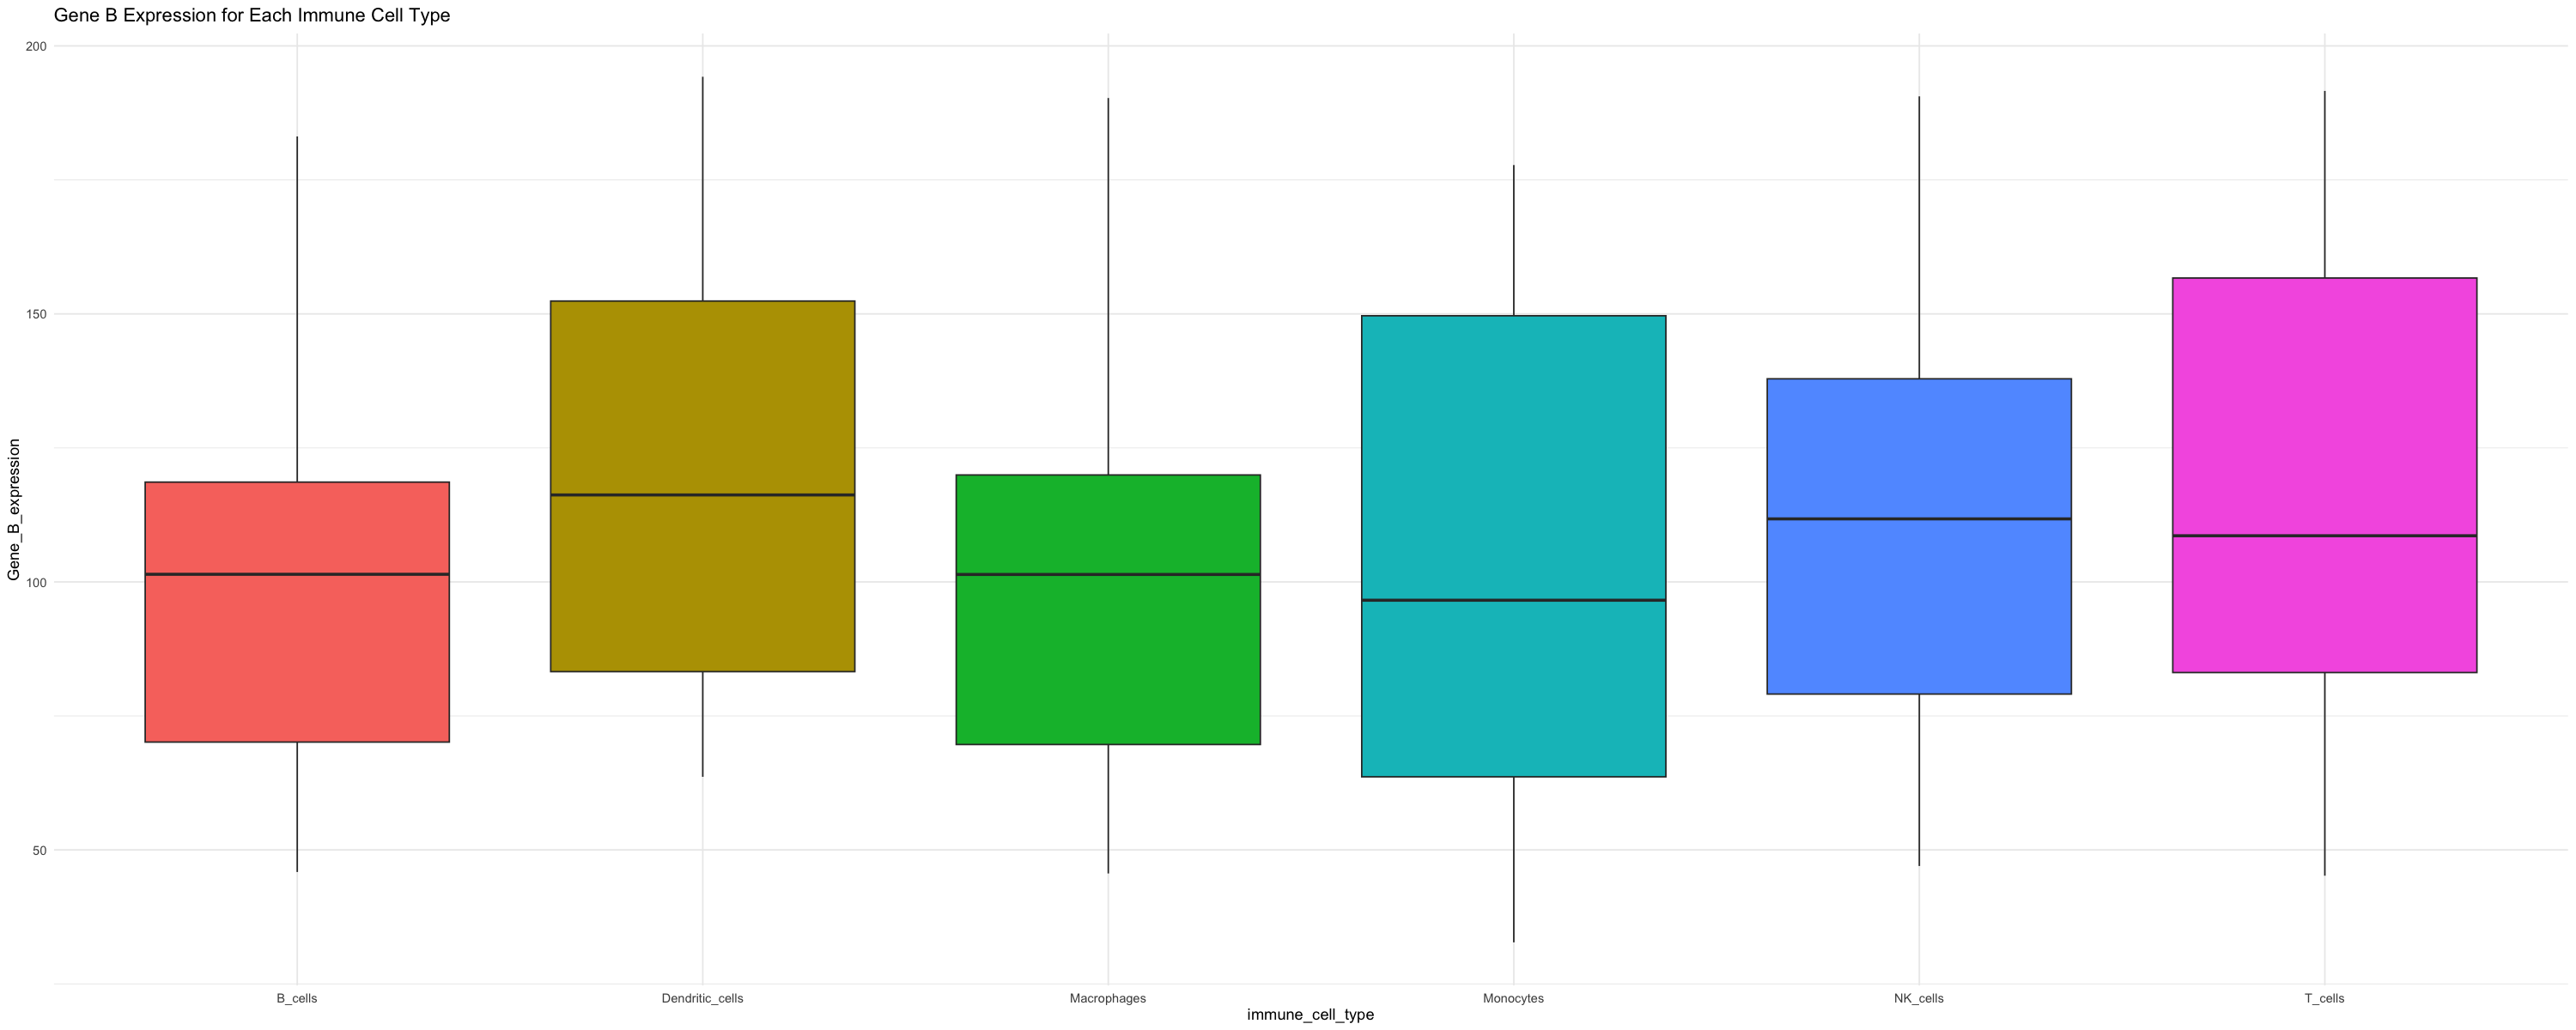

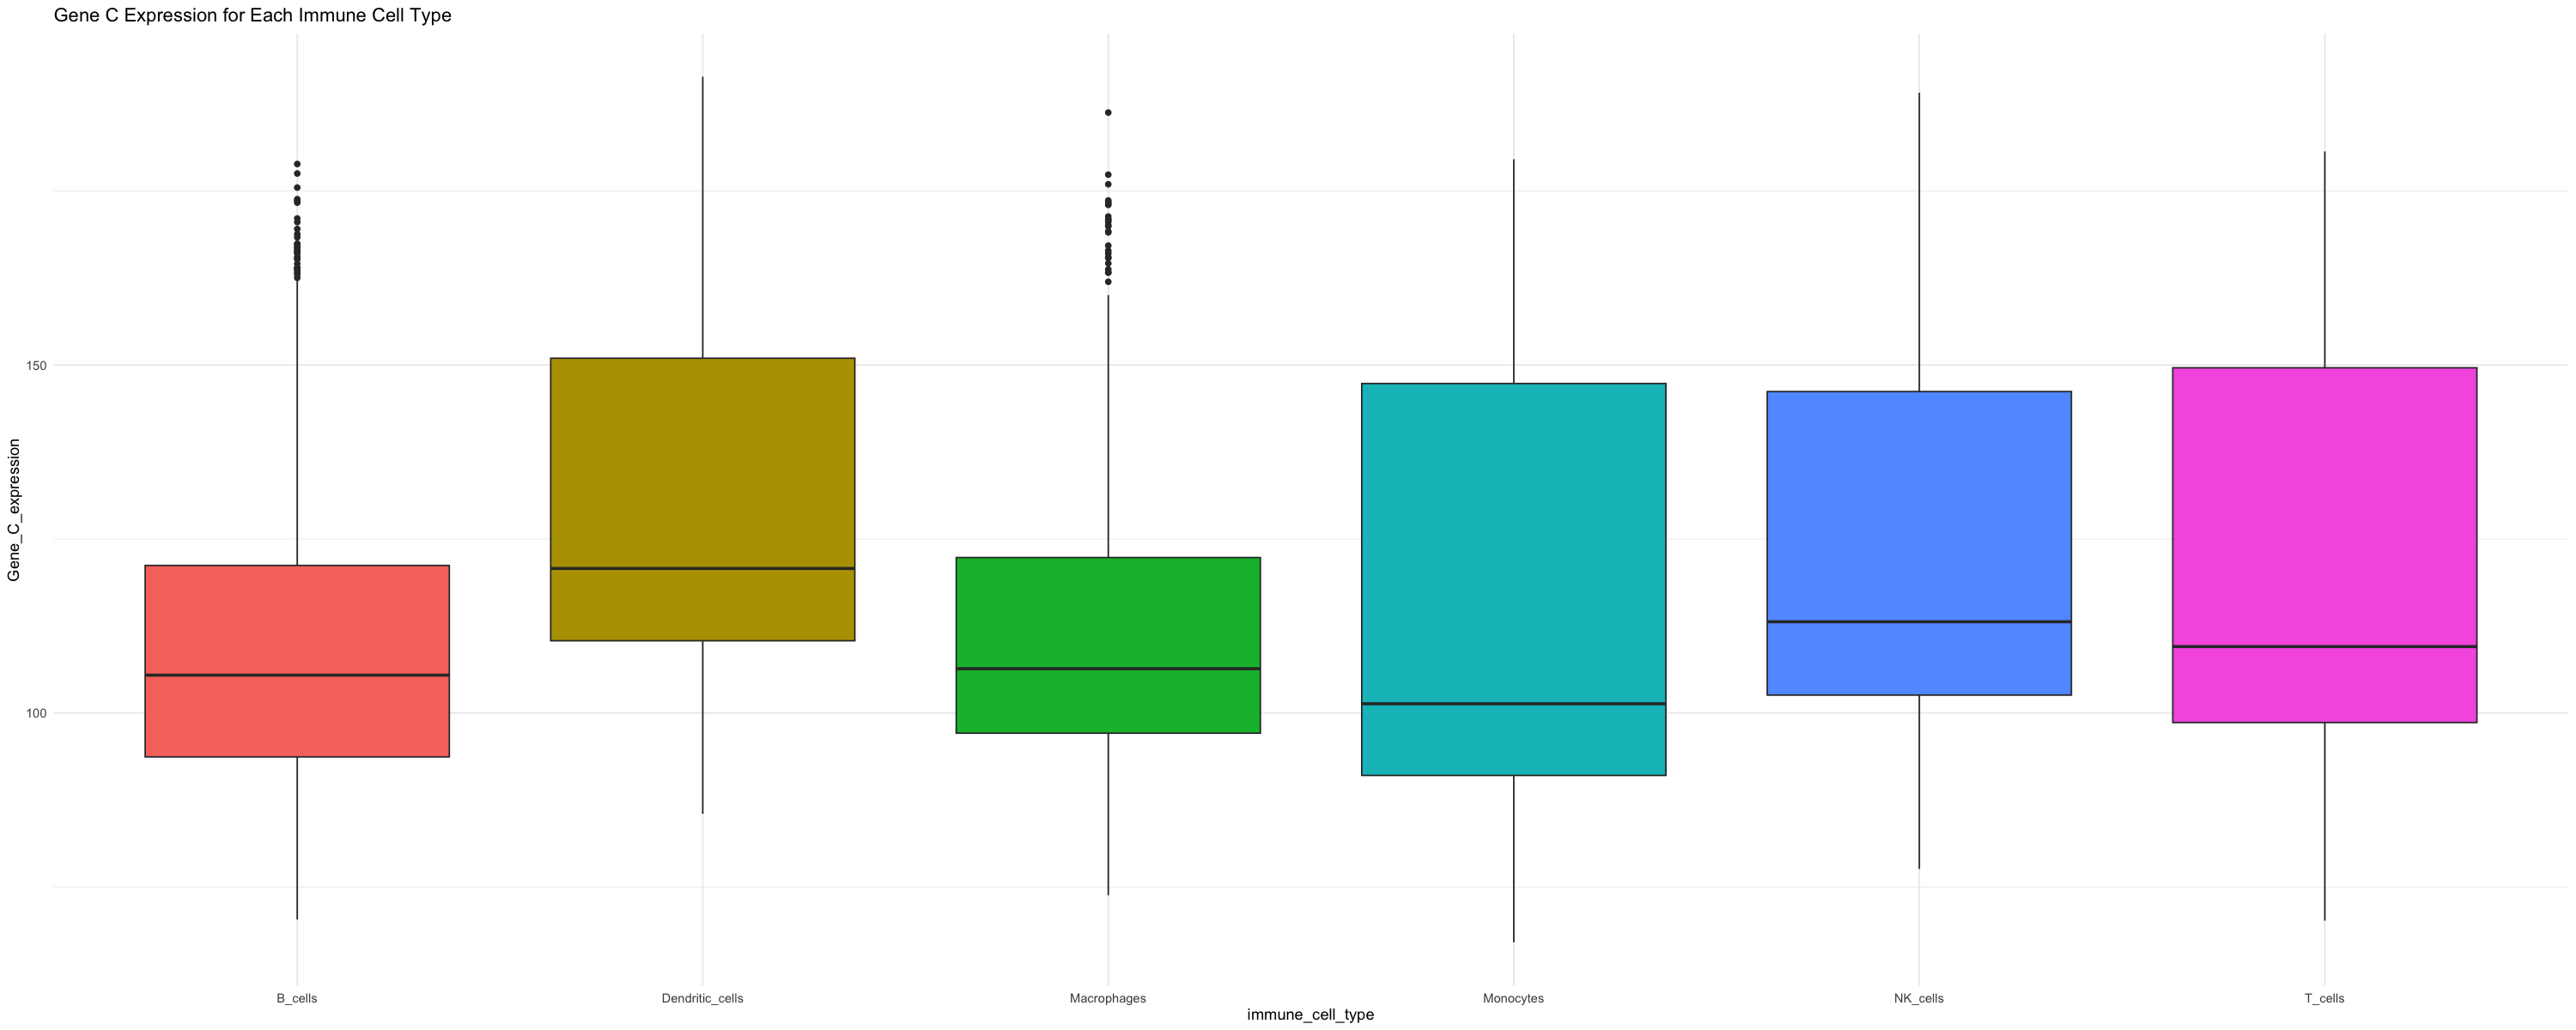

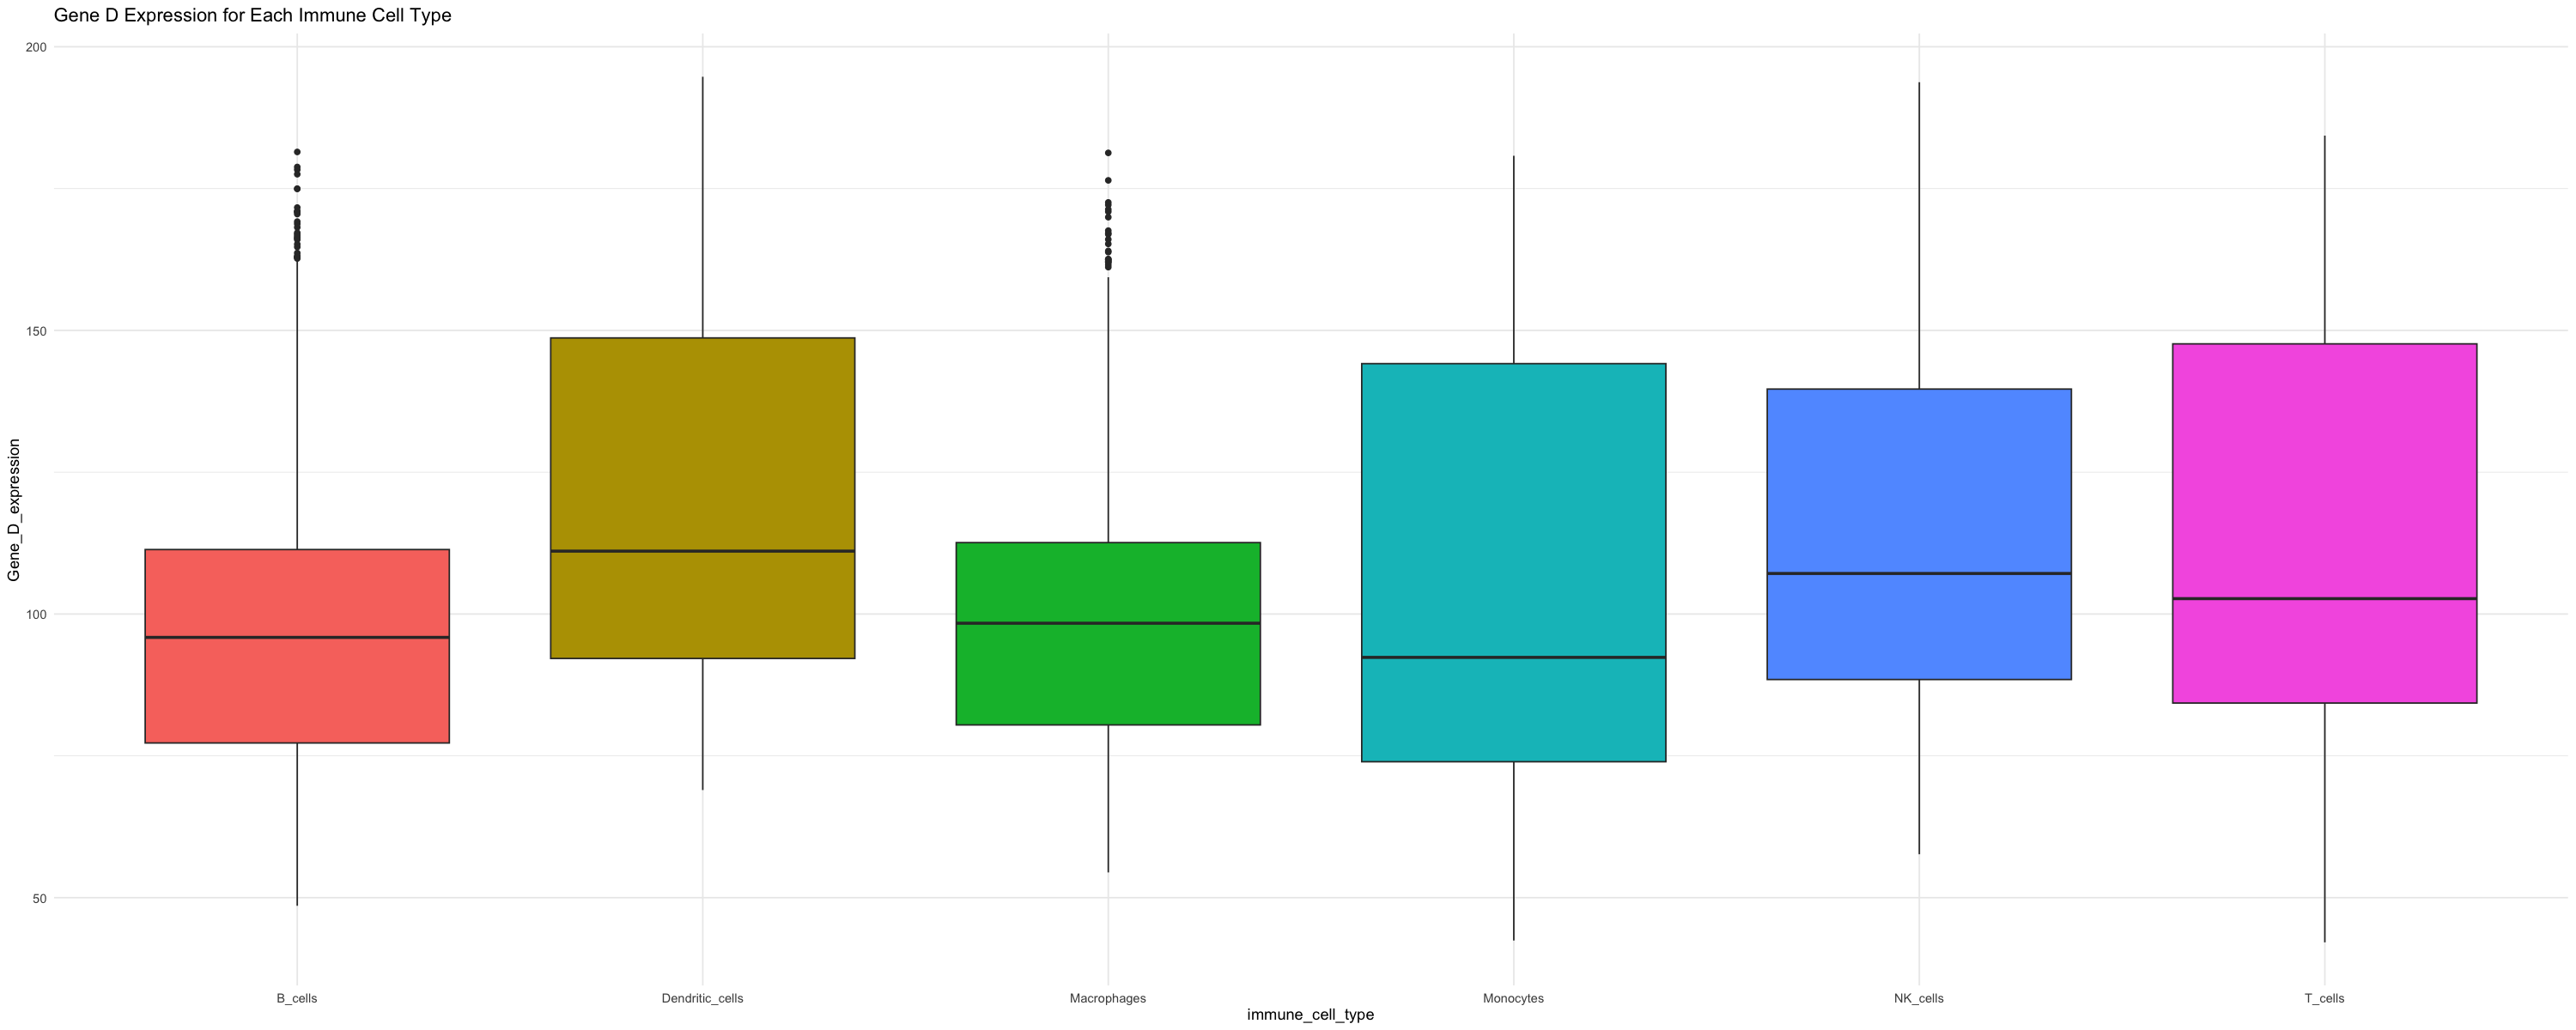

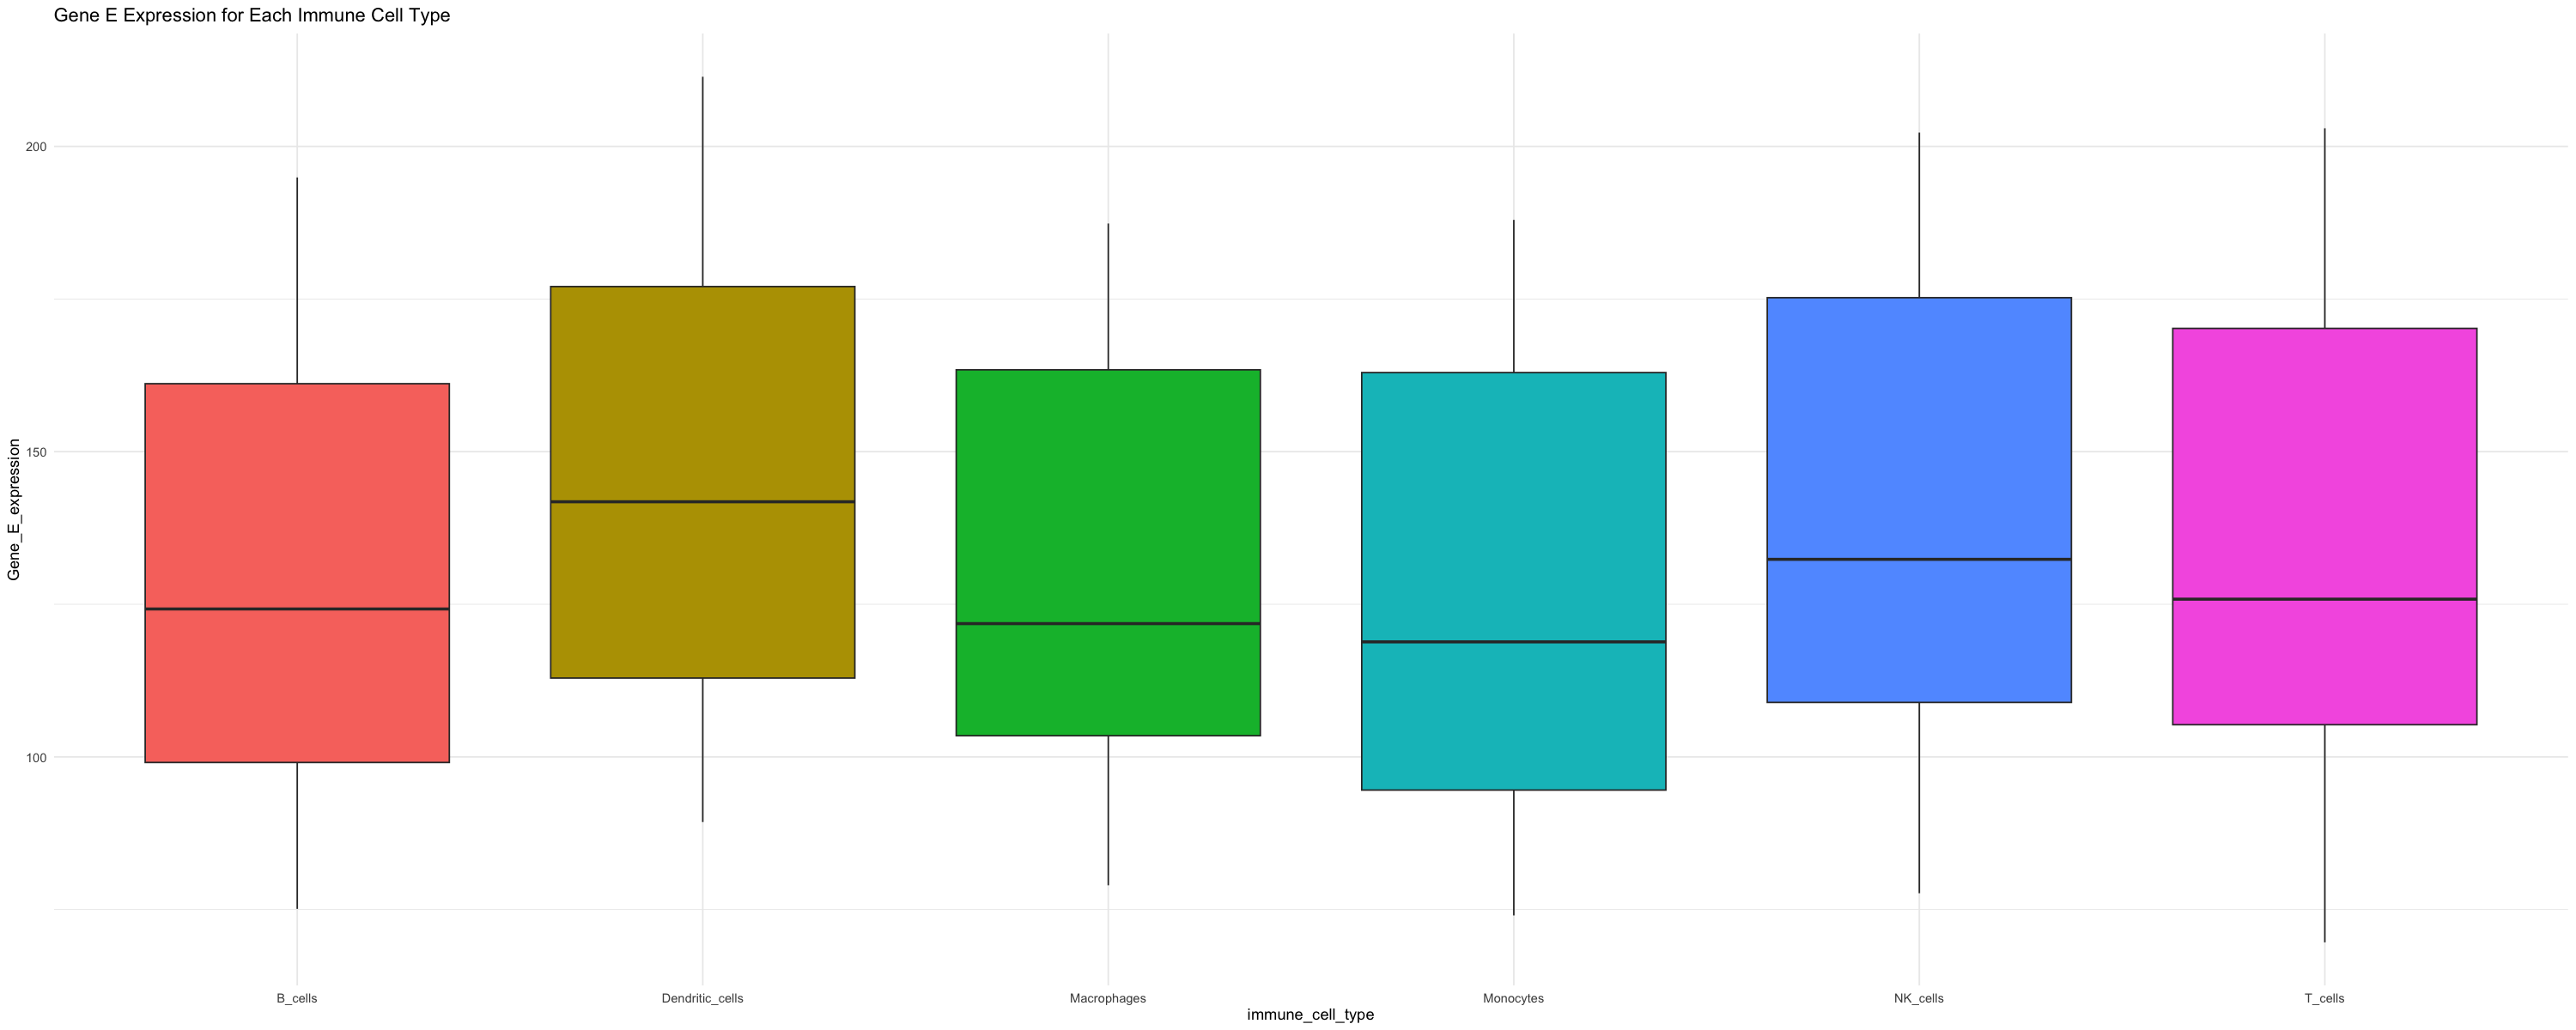

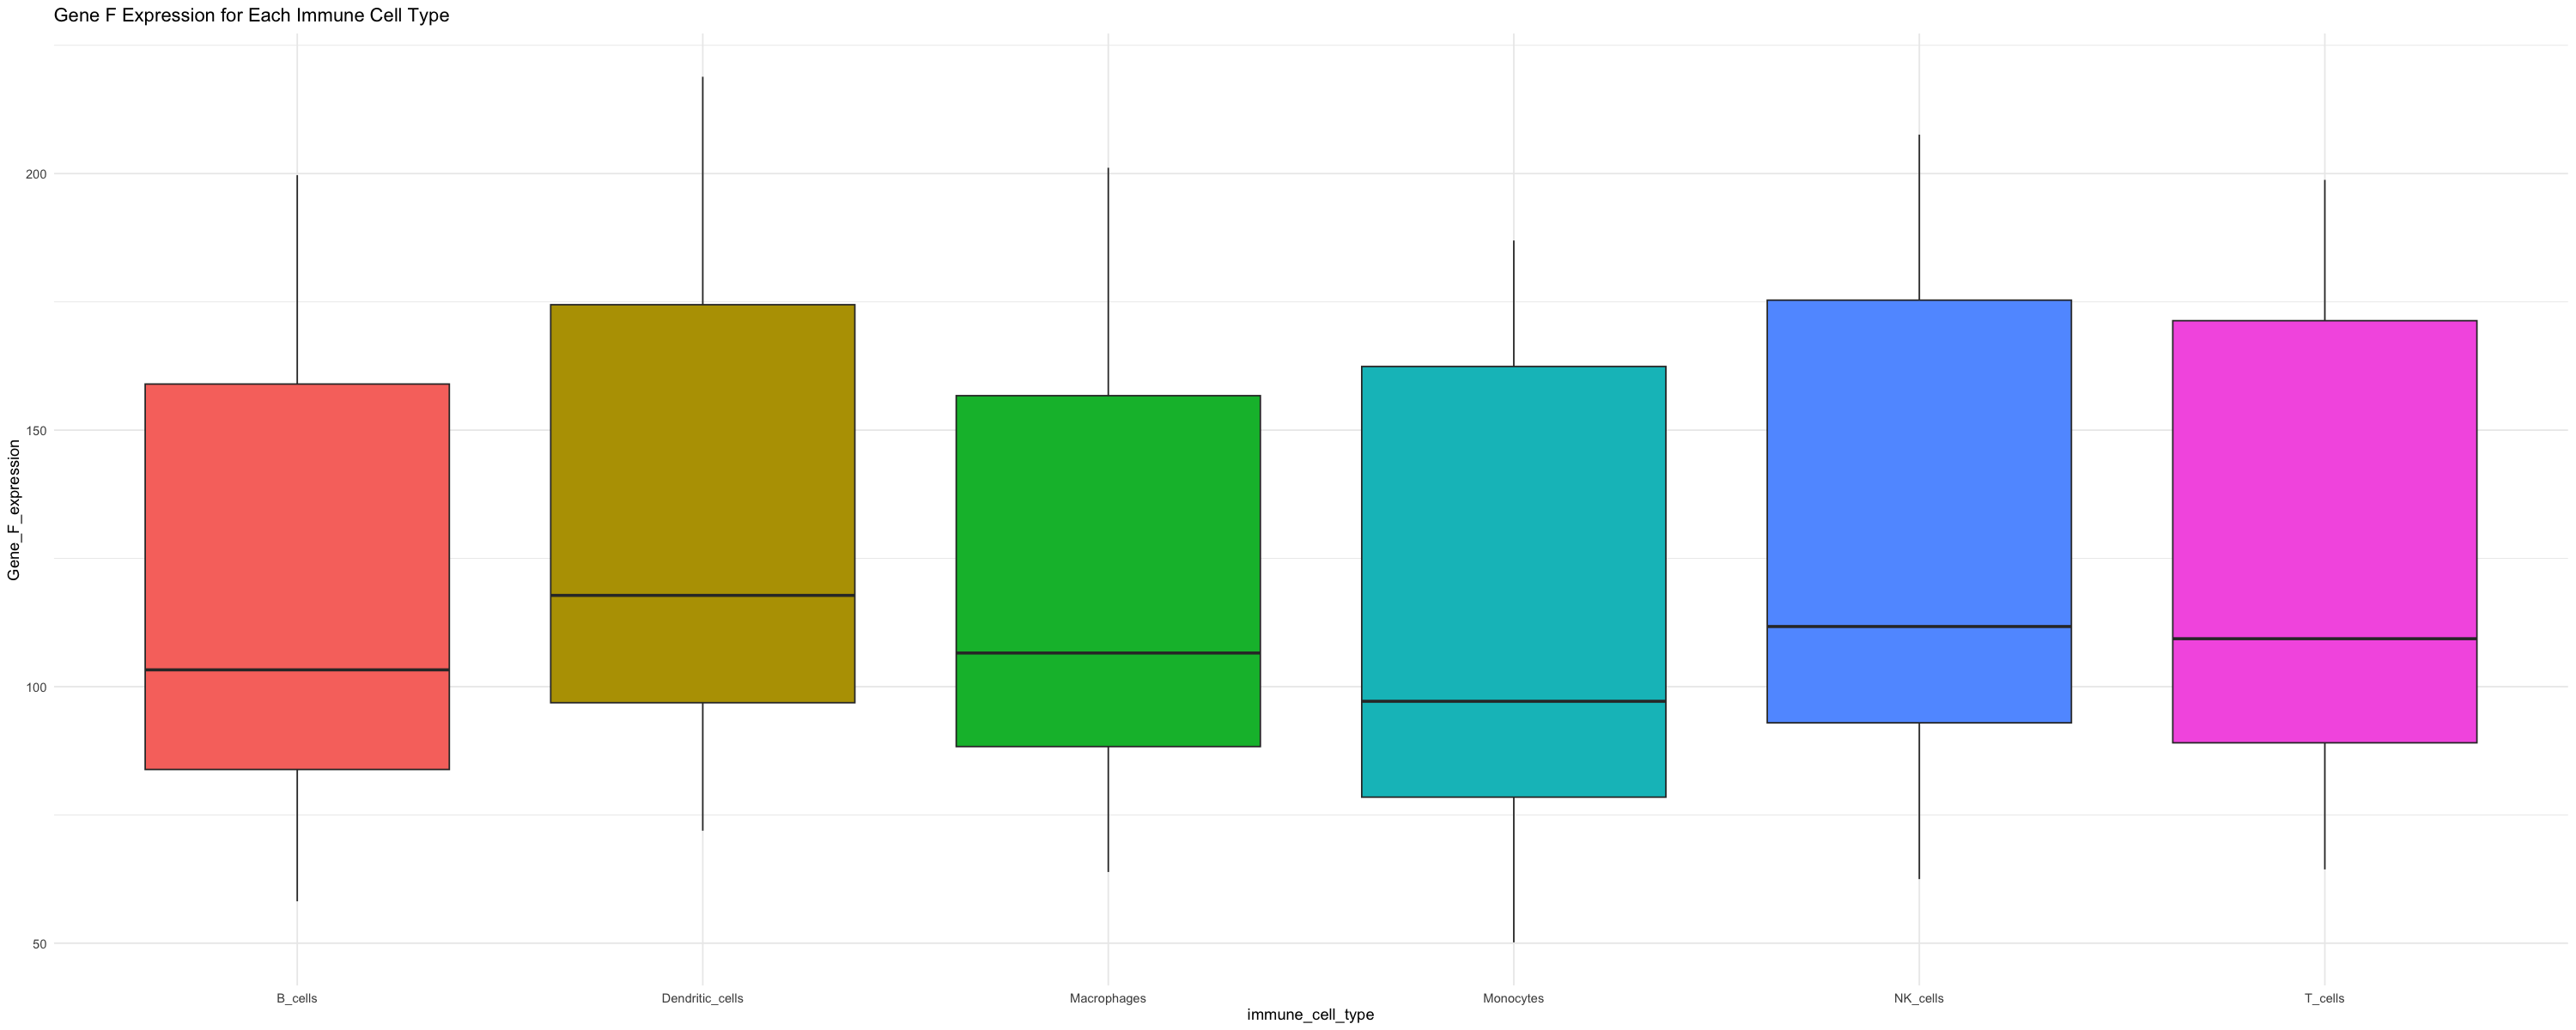

In [22]:
# (?) delete
ggplot(sharks, aes(x=immune_cell_type, y=Gene_A_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene A Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_B_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene B Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_C_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene C Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_D_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene D Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_E_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene E Expression for Each Immune Cell Type")

ggplot(sharks, aes(x=immune_cell_type, y=Gene_F_expression, fill=immune_cell_type)) +
    geom_boxplot() +
    theme_minimal() +
    theme(legend.position="none") +
    ggtitle("Gene F Expression for Each Immune Cell Type")

In [23]:
# reduce the gene categories into 2 variables
sharks_gene_expr_split = sharks %>% 
    pivot_longer(
        cols = starts_with("Gene_"),
        names_to = "gene",
        values_to = "expression"
    )

# reduce name to Gene_X 
sharks_gene_expr_split$gene <- gsub("_expression", "", sharks_gene_expr_split$gene)

# change order of physiological conditions on the x-axis 
sharks_gene_expr_split$physiological_condition <- factor(
  sharks_gene_expr_split$physiological_condition,
  levels = c("Healthy", "Stressed", "Injured", "Infected", "Recovering")
)

At first, I wanted to see the gene expression profile for each cell type.

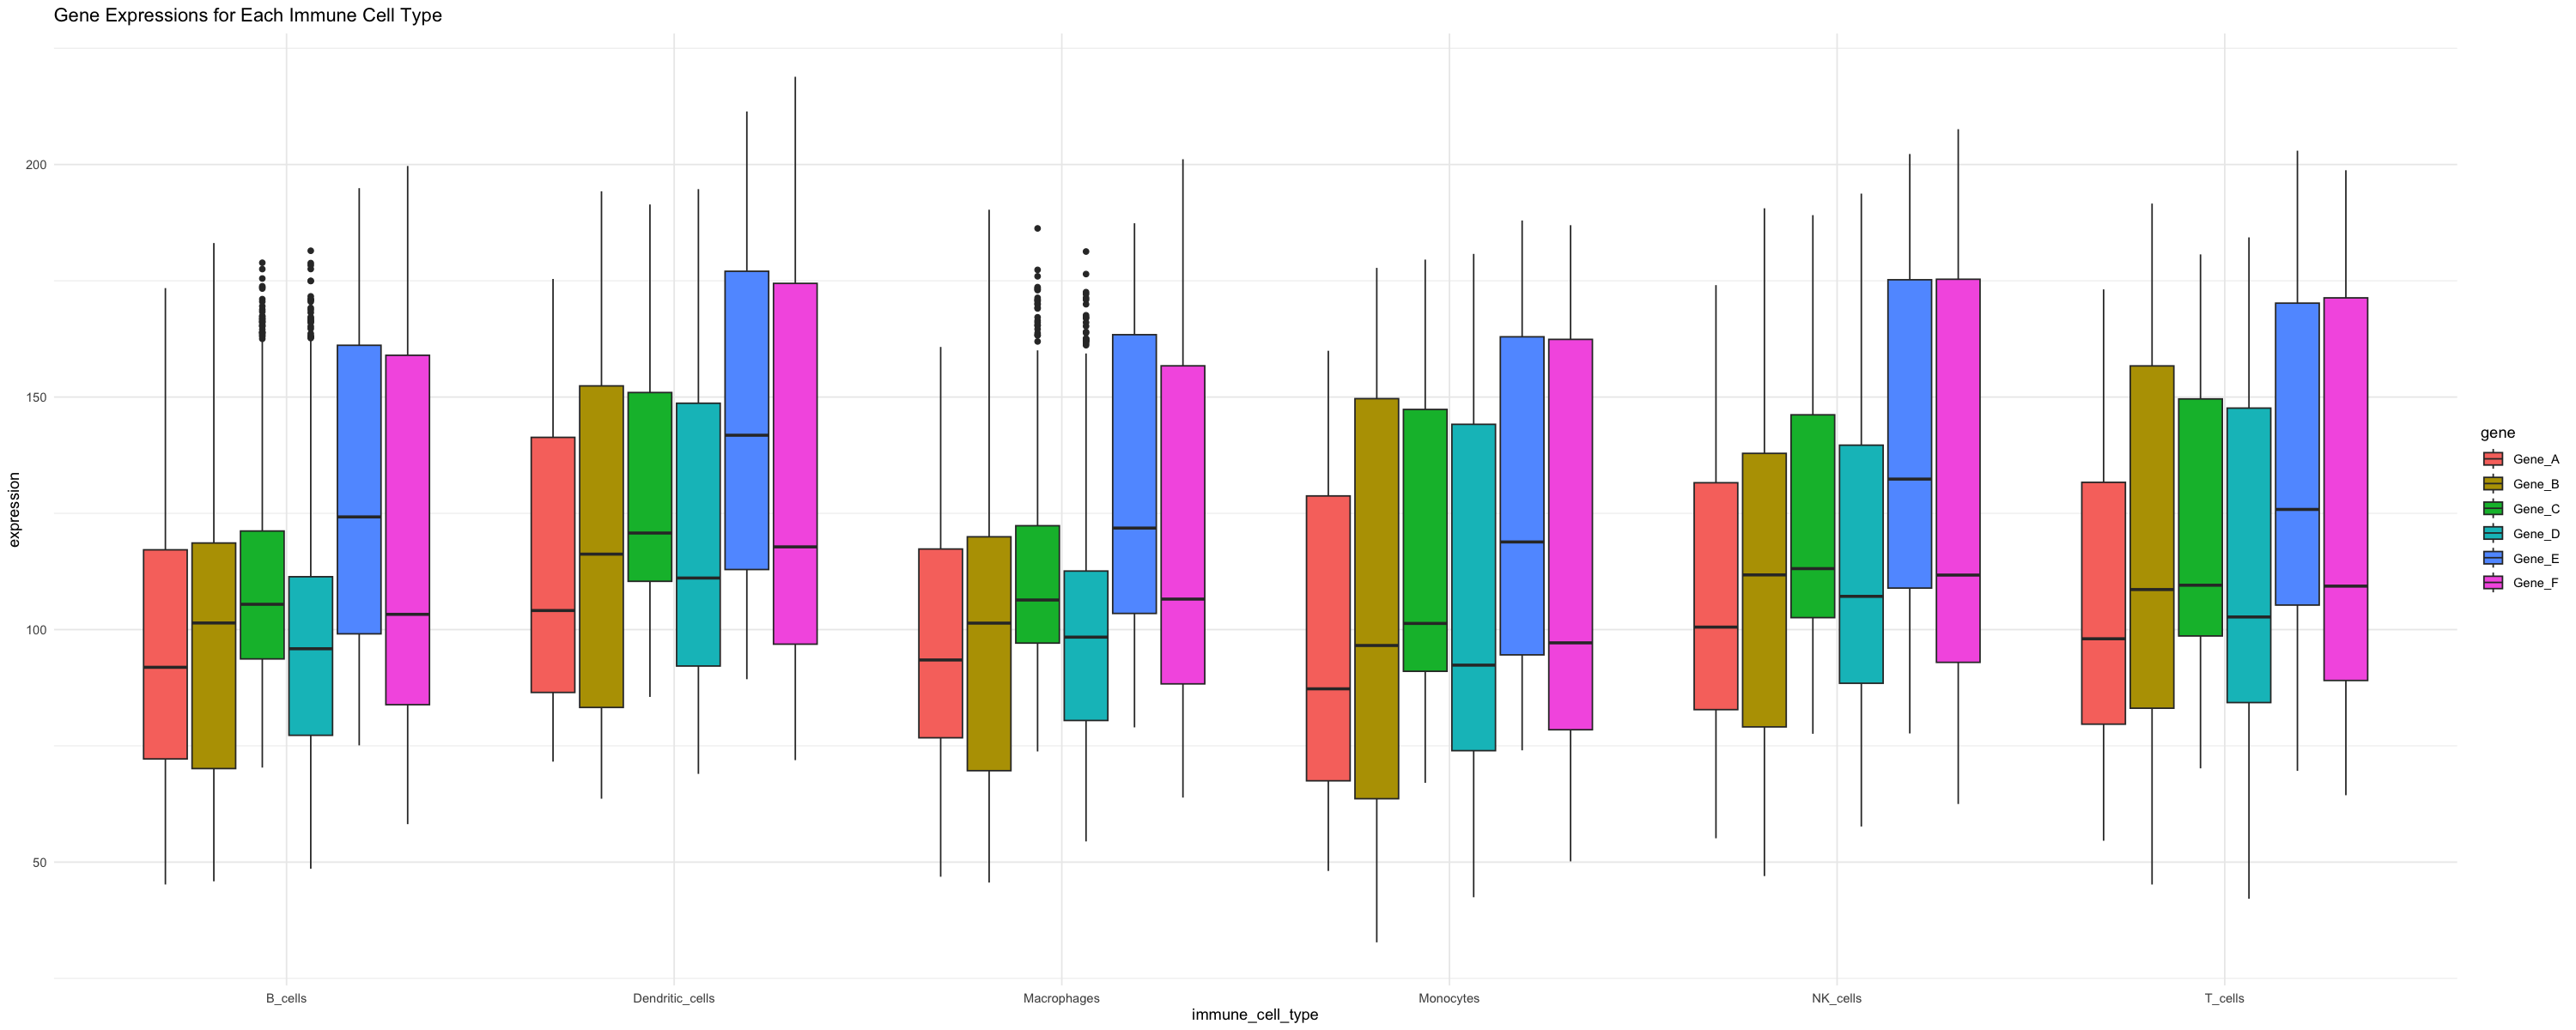

In [24]:
# plot gene expressions for immune cell types 
ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=expression, fill=gene)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Gene Expressions for Each Immune Cell Type")

But as the gene expression profiles for each cell type seemed to be similar, I then wanted to see the gene expression profile for each physiological condition. 

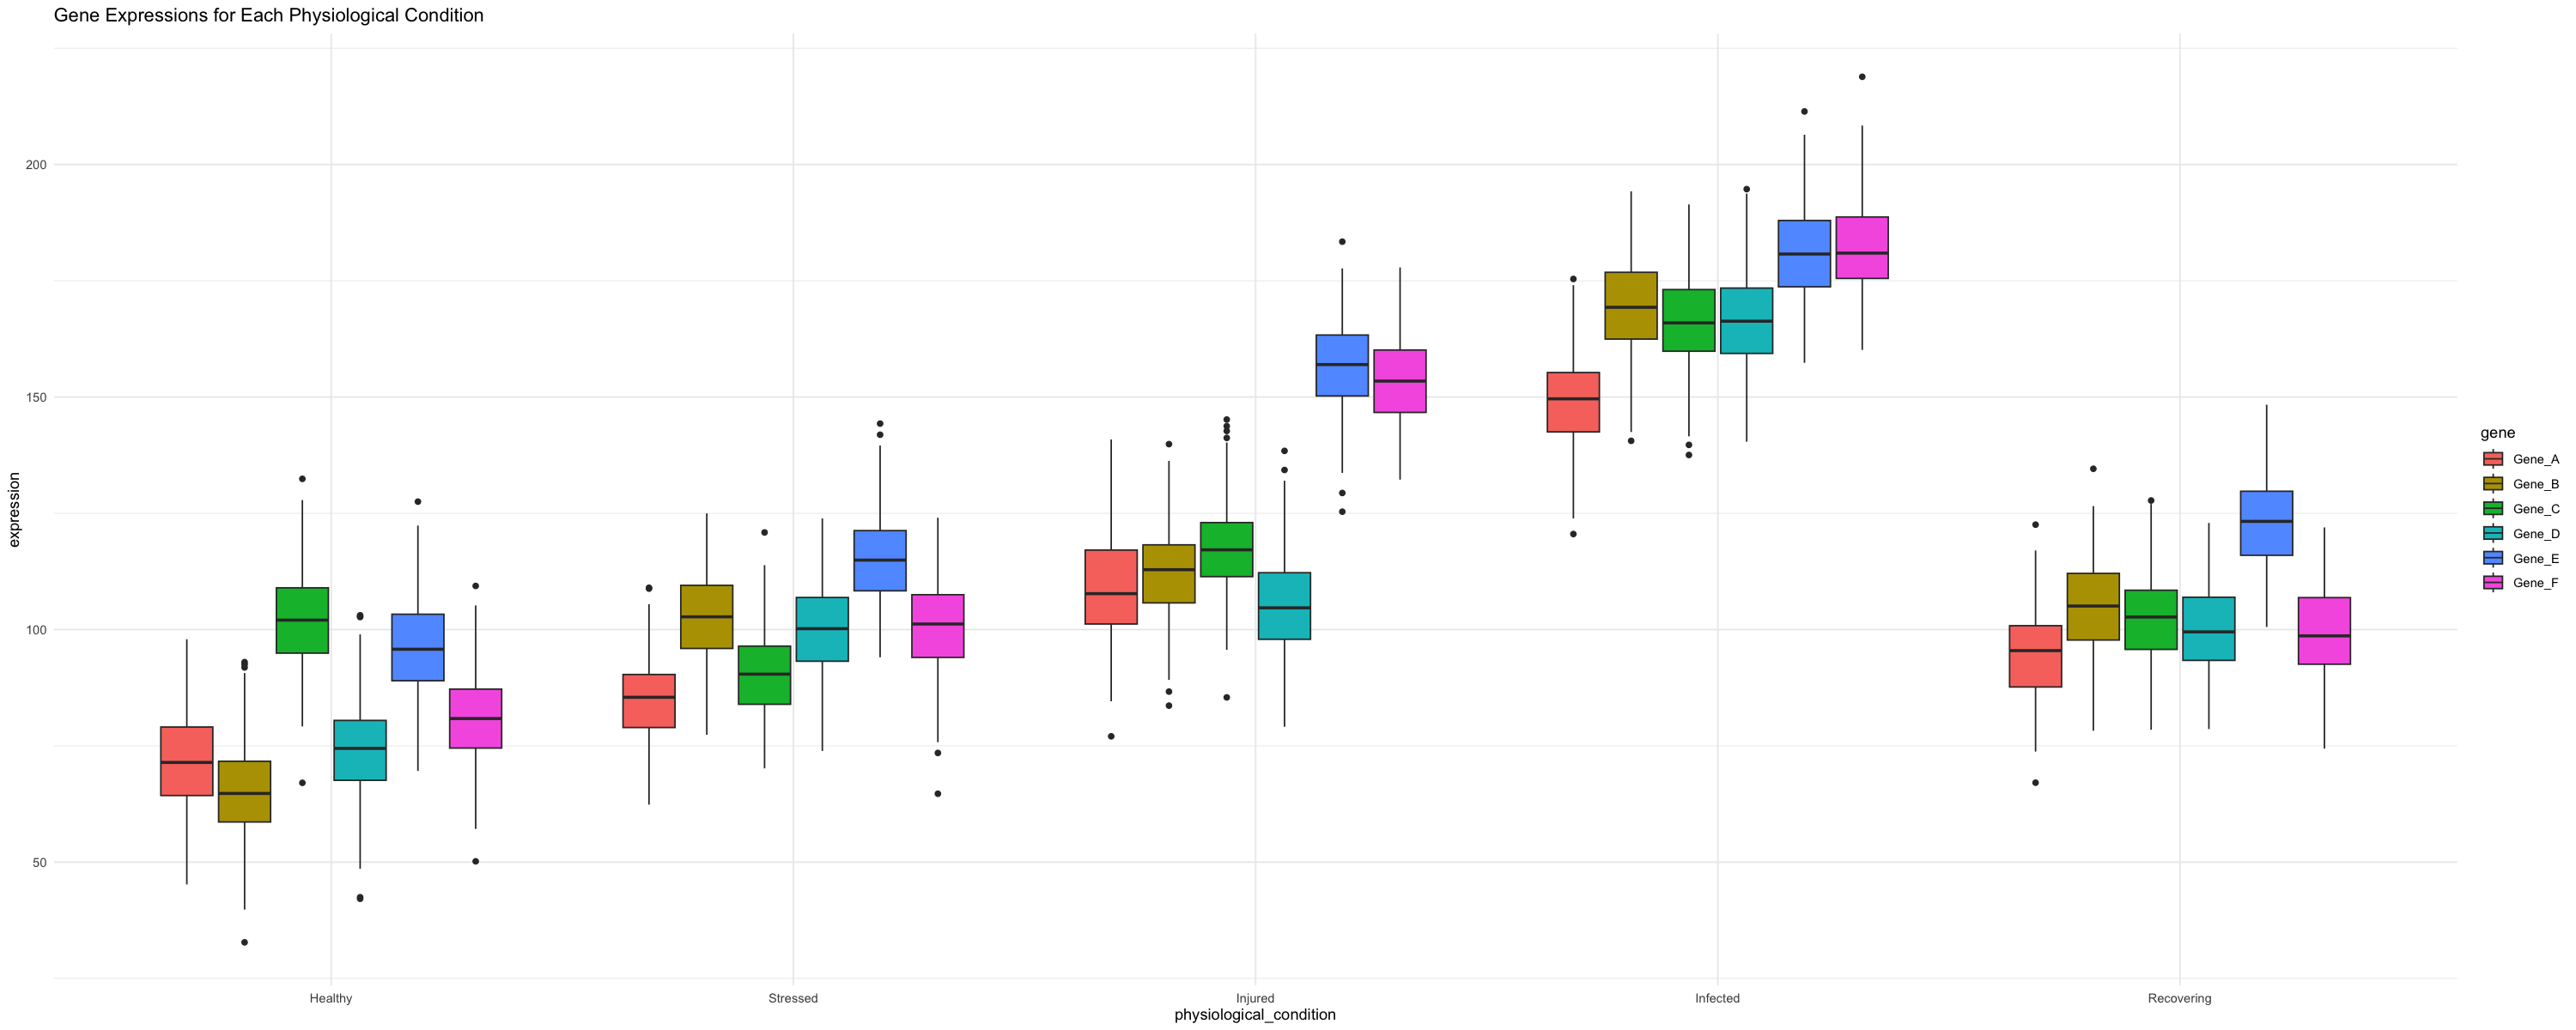

In [25]:
# plot gene expressions for physiological conditions
ggplot(sharks_gene_expr_split, aes(x=physiological_condition, y=expression, fill=gene)) +
    geom_boxplot() +
    theme_minimal() +
    ggtitle("Gene Expressions for Each Physiological Condition")

In the previous section, `Immune Cell Type Composition for Physiological Conditions`, we saw that each physiological condition corresponded to a variation in the quantity of each cell type. Logically speaking, these variations would be driven by the varying levels of gene expressions demonstrated by the graph. 

However, the most we can probably say here is that the gene expression varies with the physiological_condition. We stil cannot conclude on the relationship between the expression of a gene specific and the physiological condition. The previous two approaches were too simplistic. It would be better to look at the gene expression for each immune cell type in a certain physiological condition.

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


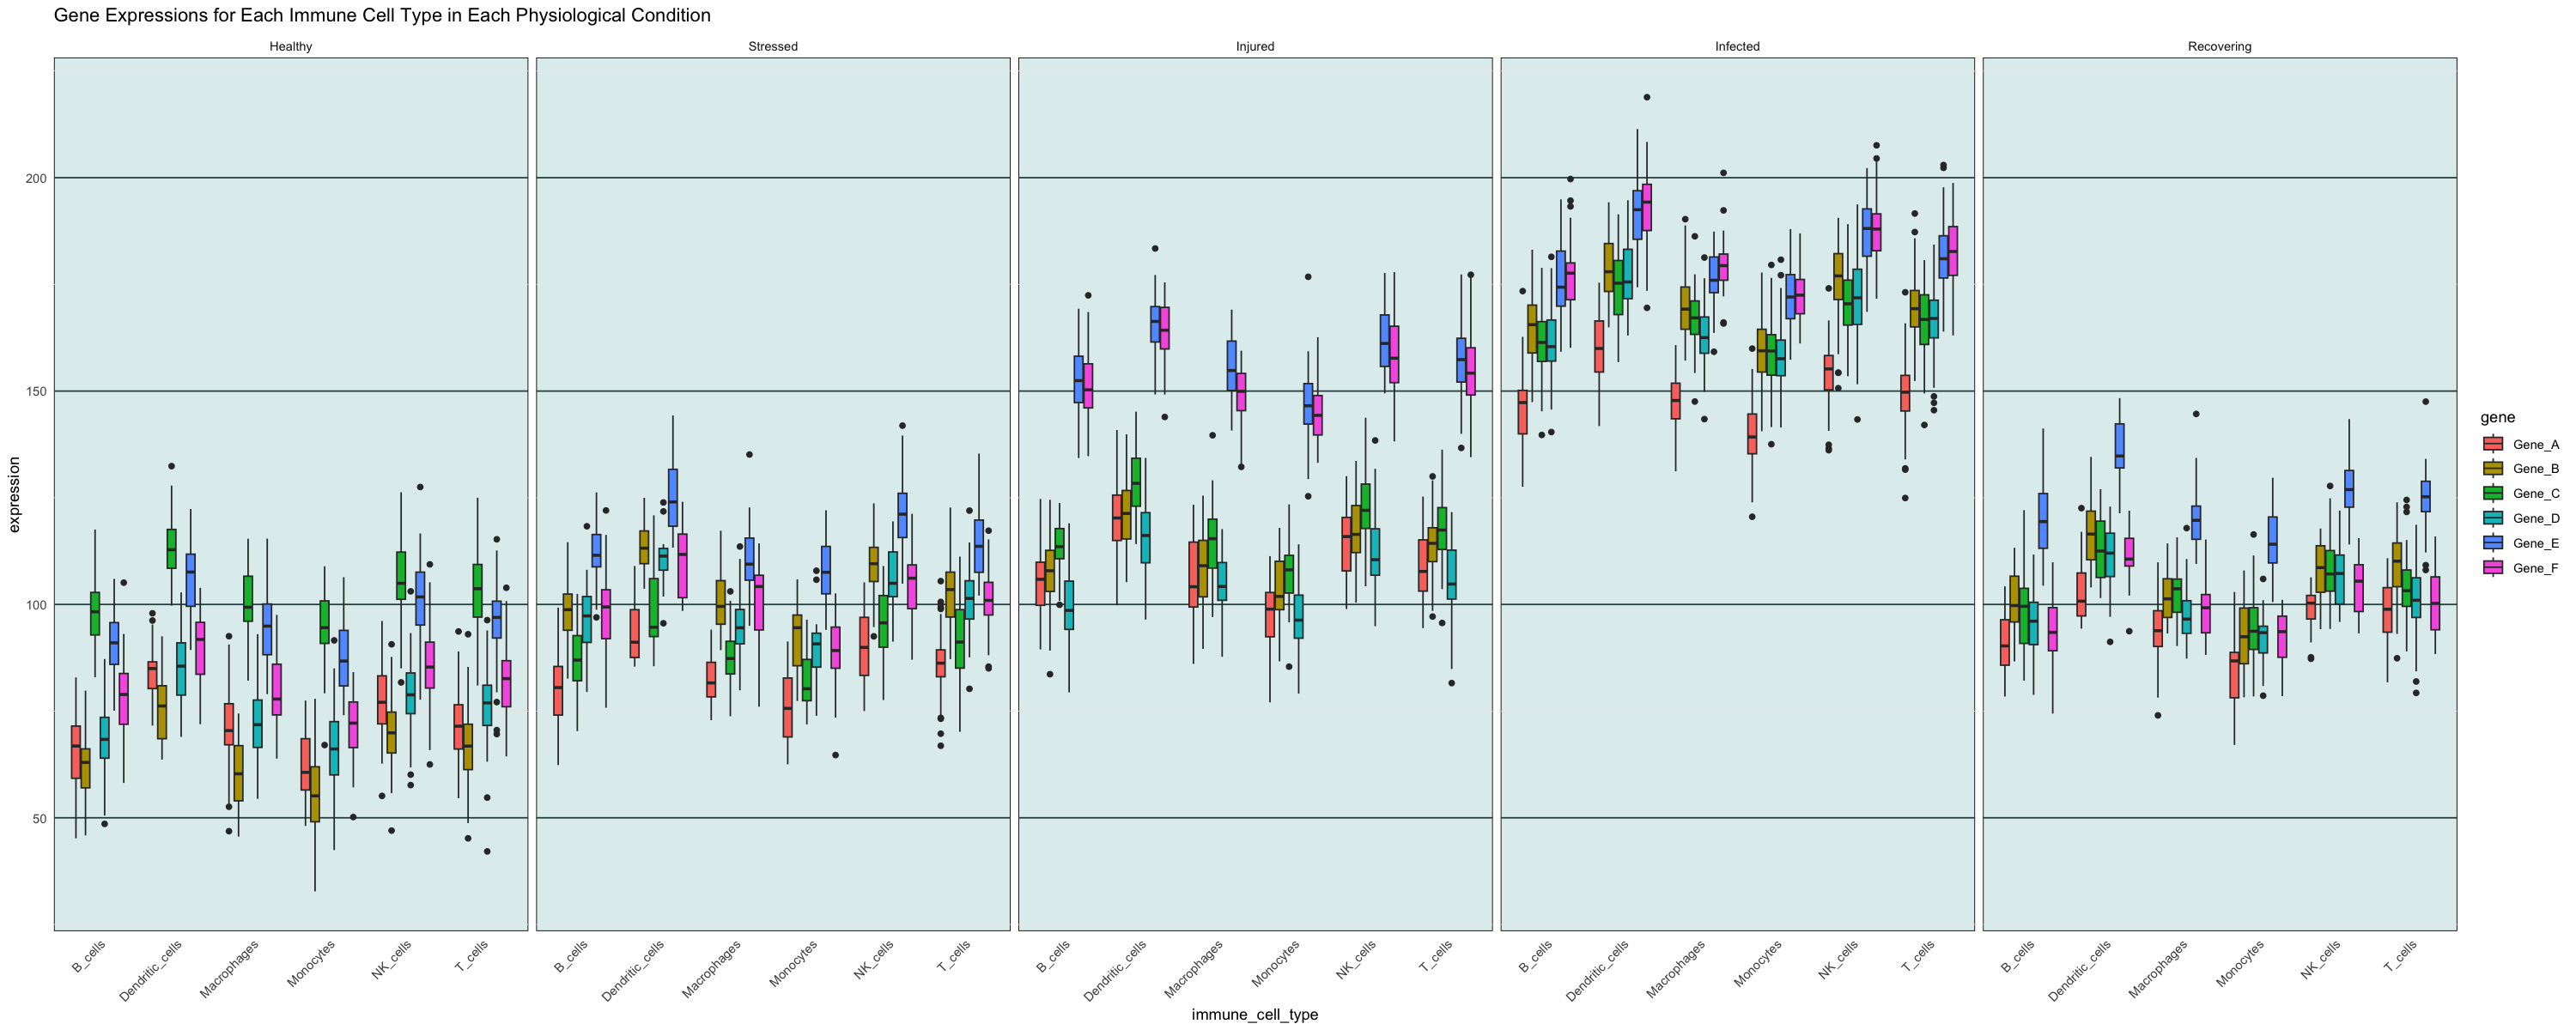

In [26]:
# plot the gene expressions for each immune cell type in a physiological condition
ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=expression, fill=gene)) +
    geom_boxplot() +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

Here, we can see that the expression of a gene varies according to the immune cell type and the physiological condition. Interestingly, the gene expression profile for one cell type in a physiological condition tends to be similar to the expression profile for the other cell types in the same physiological condition.

For further simplicity, I decided to graph the mean expression level of each gene for each immune cell type in each physiological condition.

In [29]:
# get the mean expression levels for each gene for each immune cell type in each physiological condition
gene_expr_means = sharks_gene_expr_split %>%
    group_by(physiological_condition, immune_cell_type, gene) %>%
    summarise(mean_expr = mean(expression, na.rm=TRUE))

`summarise()` has grouped output by 'physiological_condition',
'immune_cell_type'. You can override using the `.groups` argument.


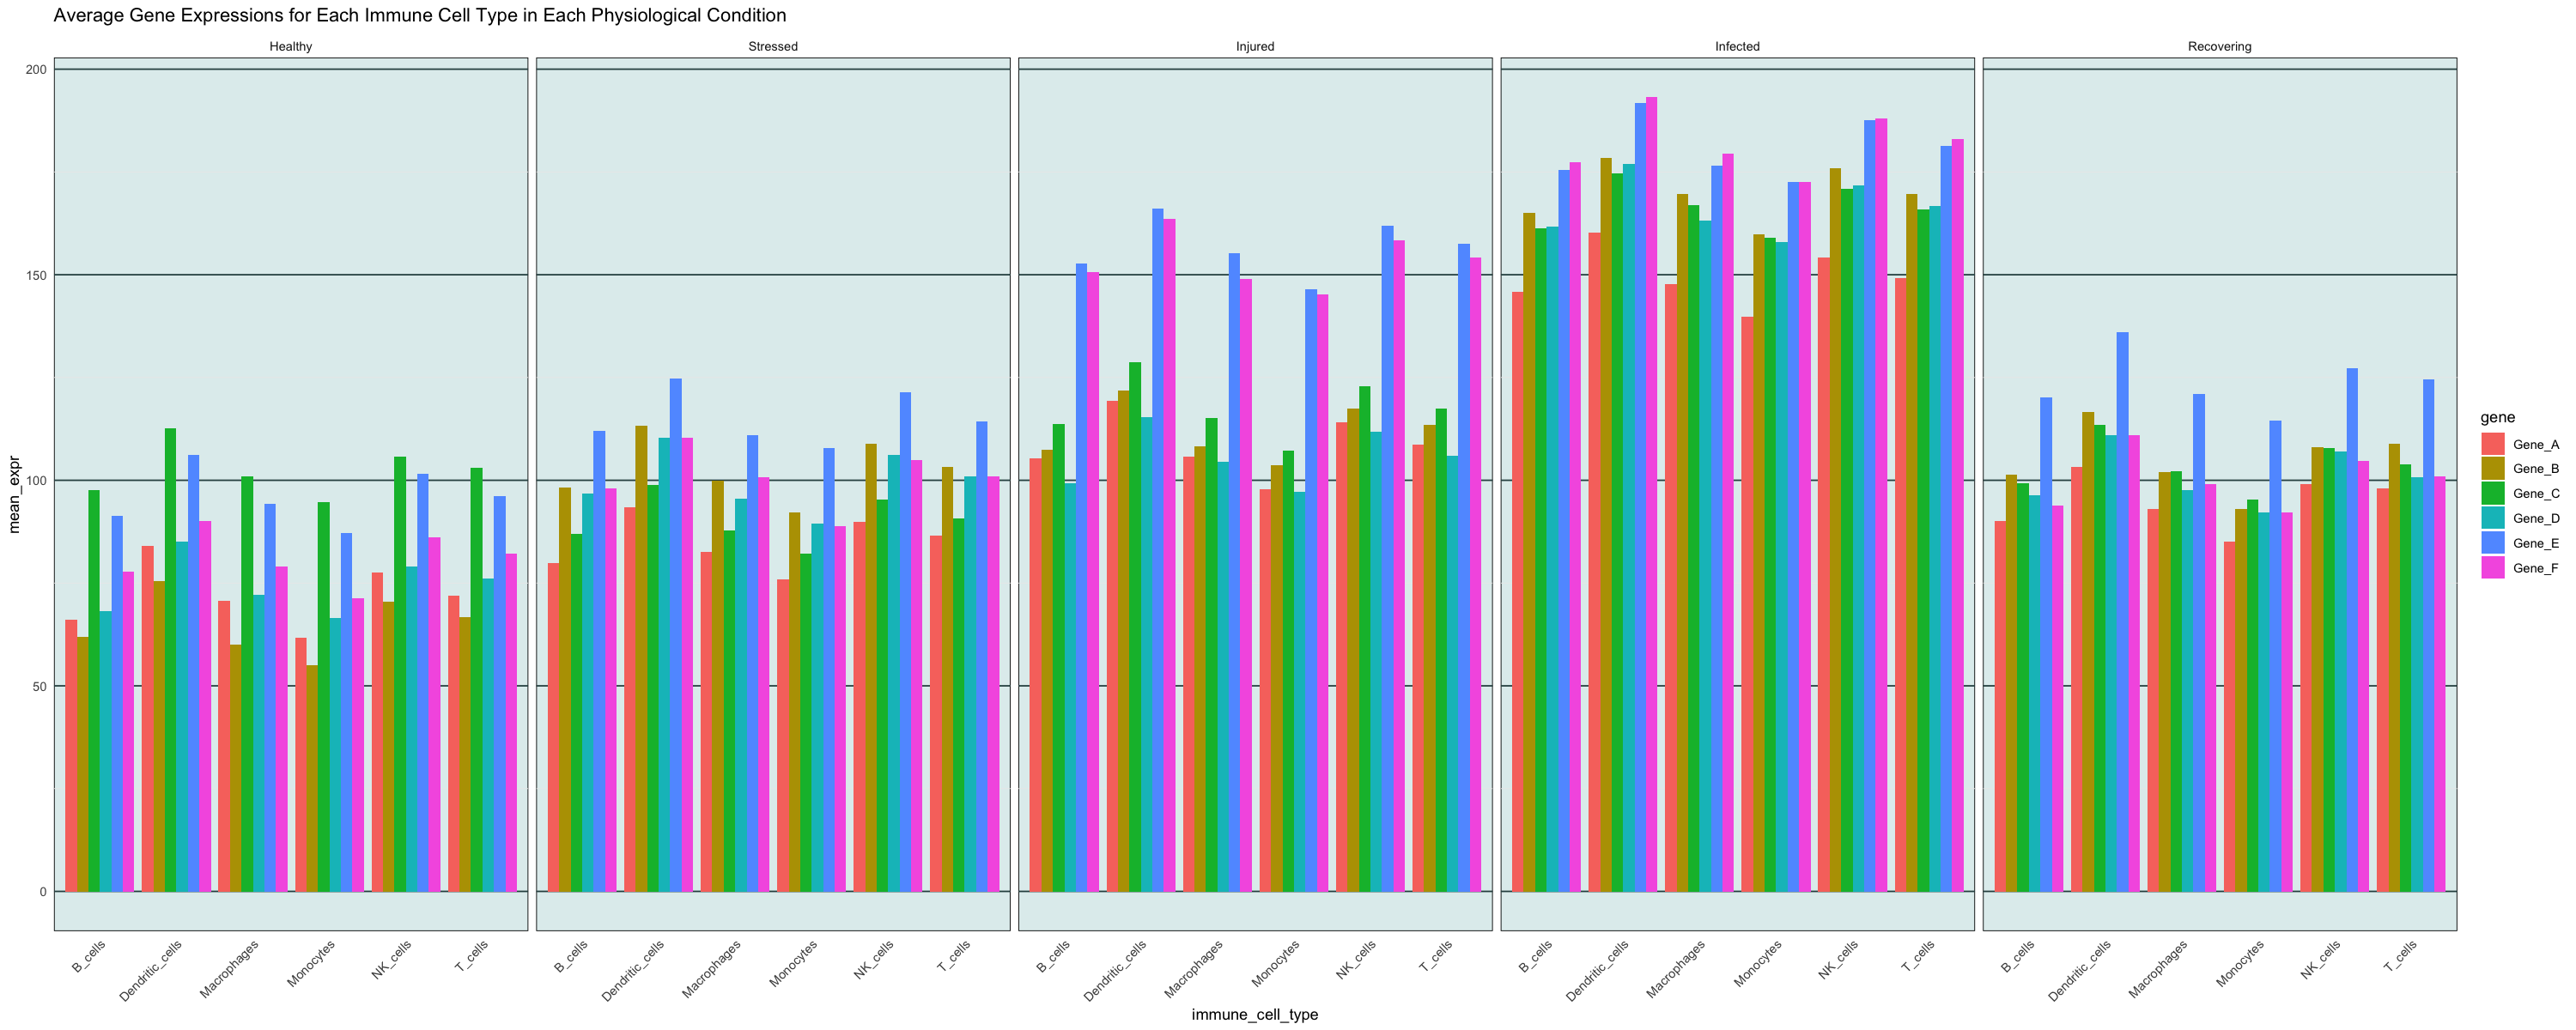

In [60]:
# plot the average gene expression for each immune cell type in a physiological condition
ggplot(gene_expr_means, aes(x=immune_cell_type, y=mean_expr, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

To more easily compare the variation in averages, I normalized each value to its healthy condition counterpart.

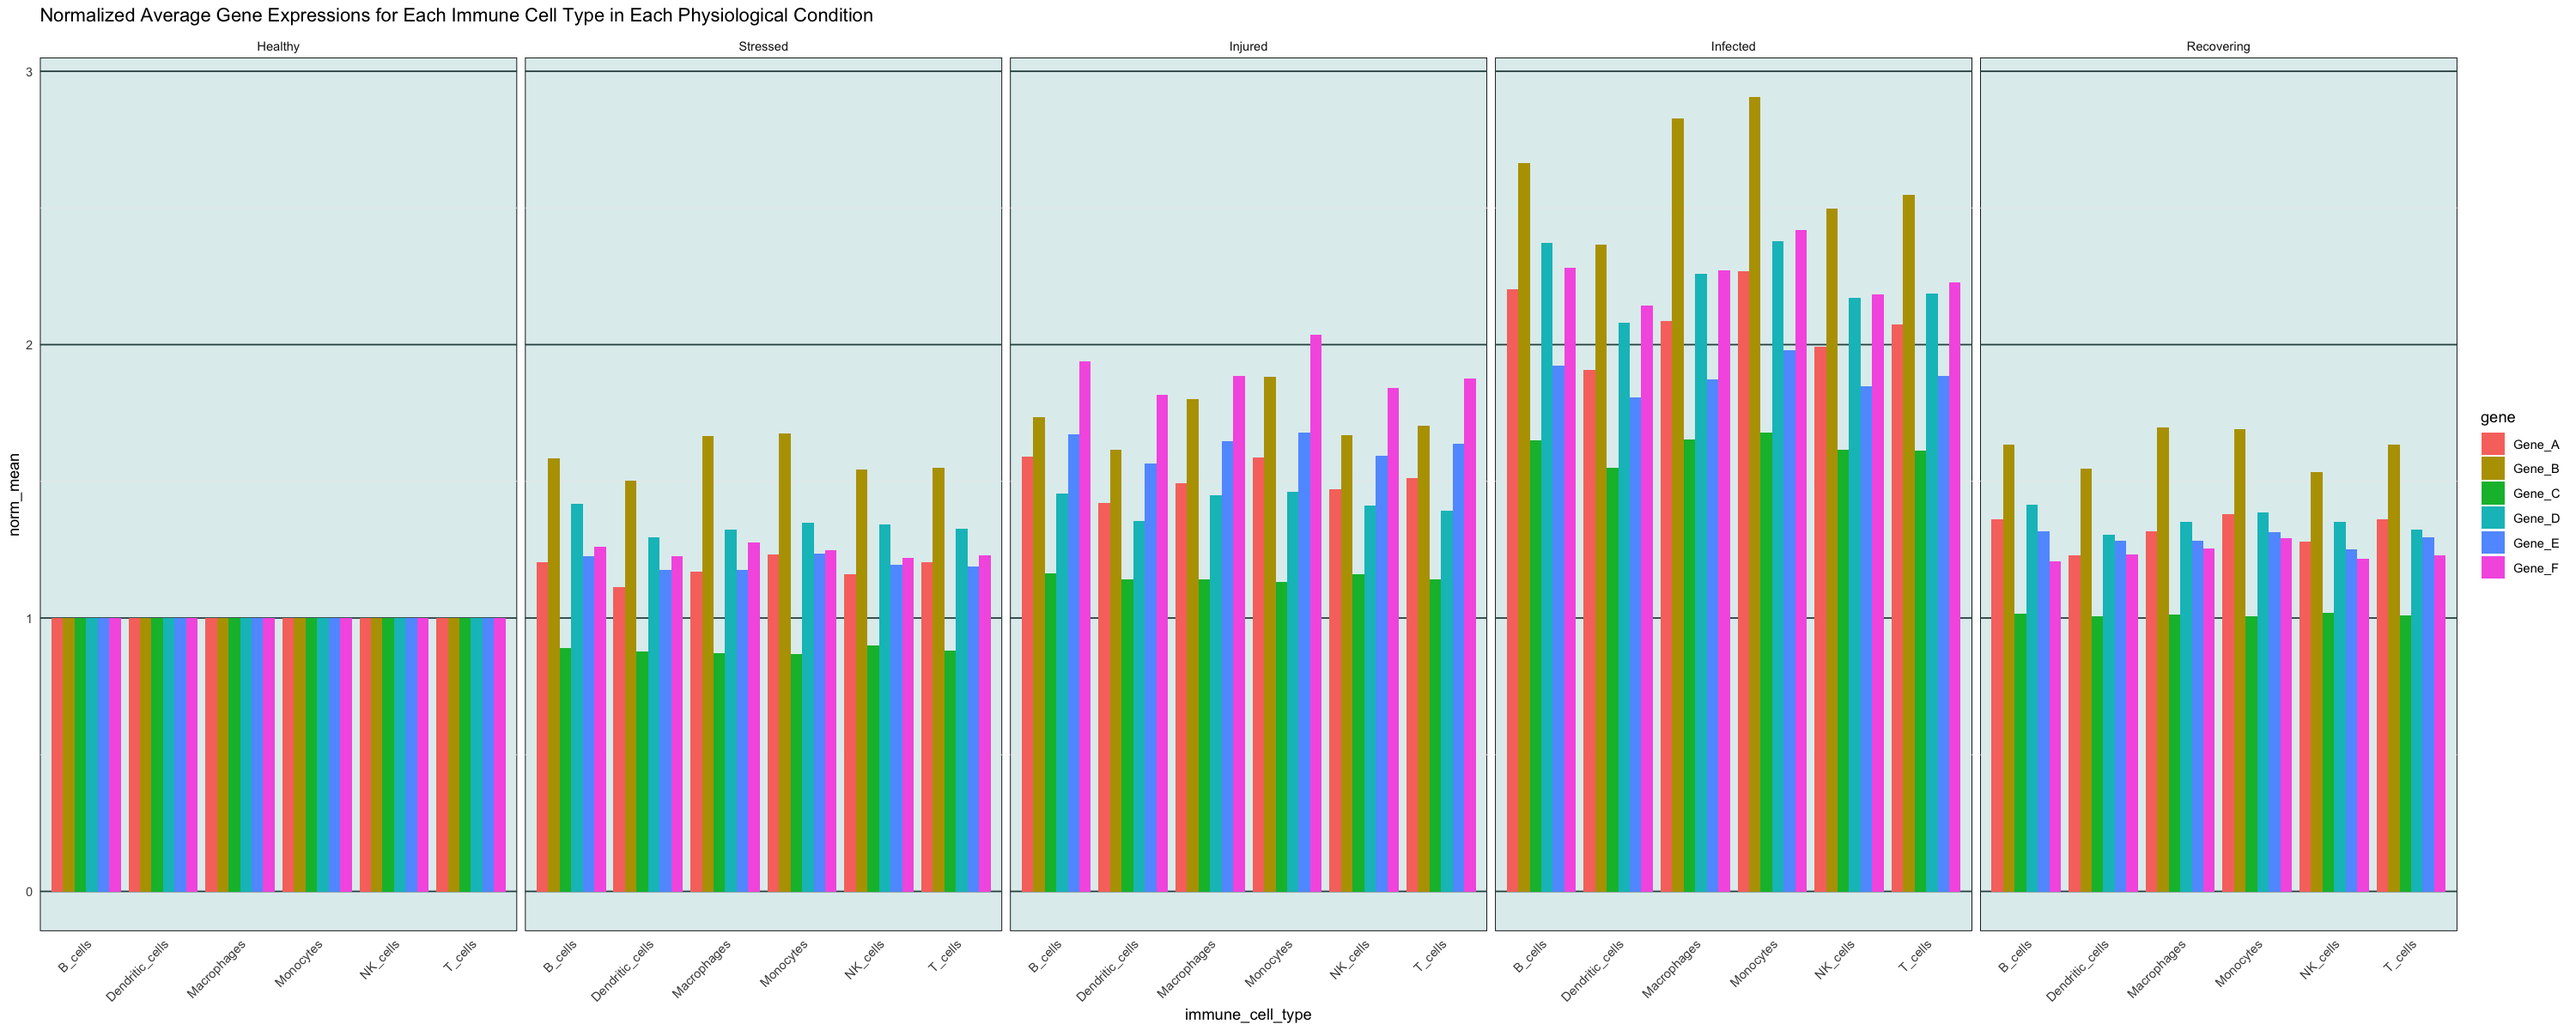

In [31]:
# normalize means
norm_gene_expr_means = gene_expr_means %>%
    group_by(immune_cell_type) %>%
    mutate(norm_mean = mean_expr/mean_expr[physiological_condition == "Healthy"])

# plot normalized means (side by side)
ggplot(norm_gene_expr_means, aes(x=immune_cell_type, y=norm_mean, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

For the most part, the observation that the gene expression profile for one immune cell type in a physiological condition is similar to other types in the same condition still holds true. 

There are still some potentially important differences in expression, though.

- Stressed / Recovering (Gene C, Gene F)
- Injured / All (Gene F)
- Stressed, Infected, Recovering / Injured (Gene B)
- Stressed, Recovering / Injured / Infected (Gene D / Gene E / Gene F)

#### [WIP] Summary on Relationships Between Physiological Conditions, Immune Cell Types, and Gene Expression

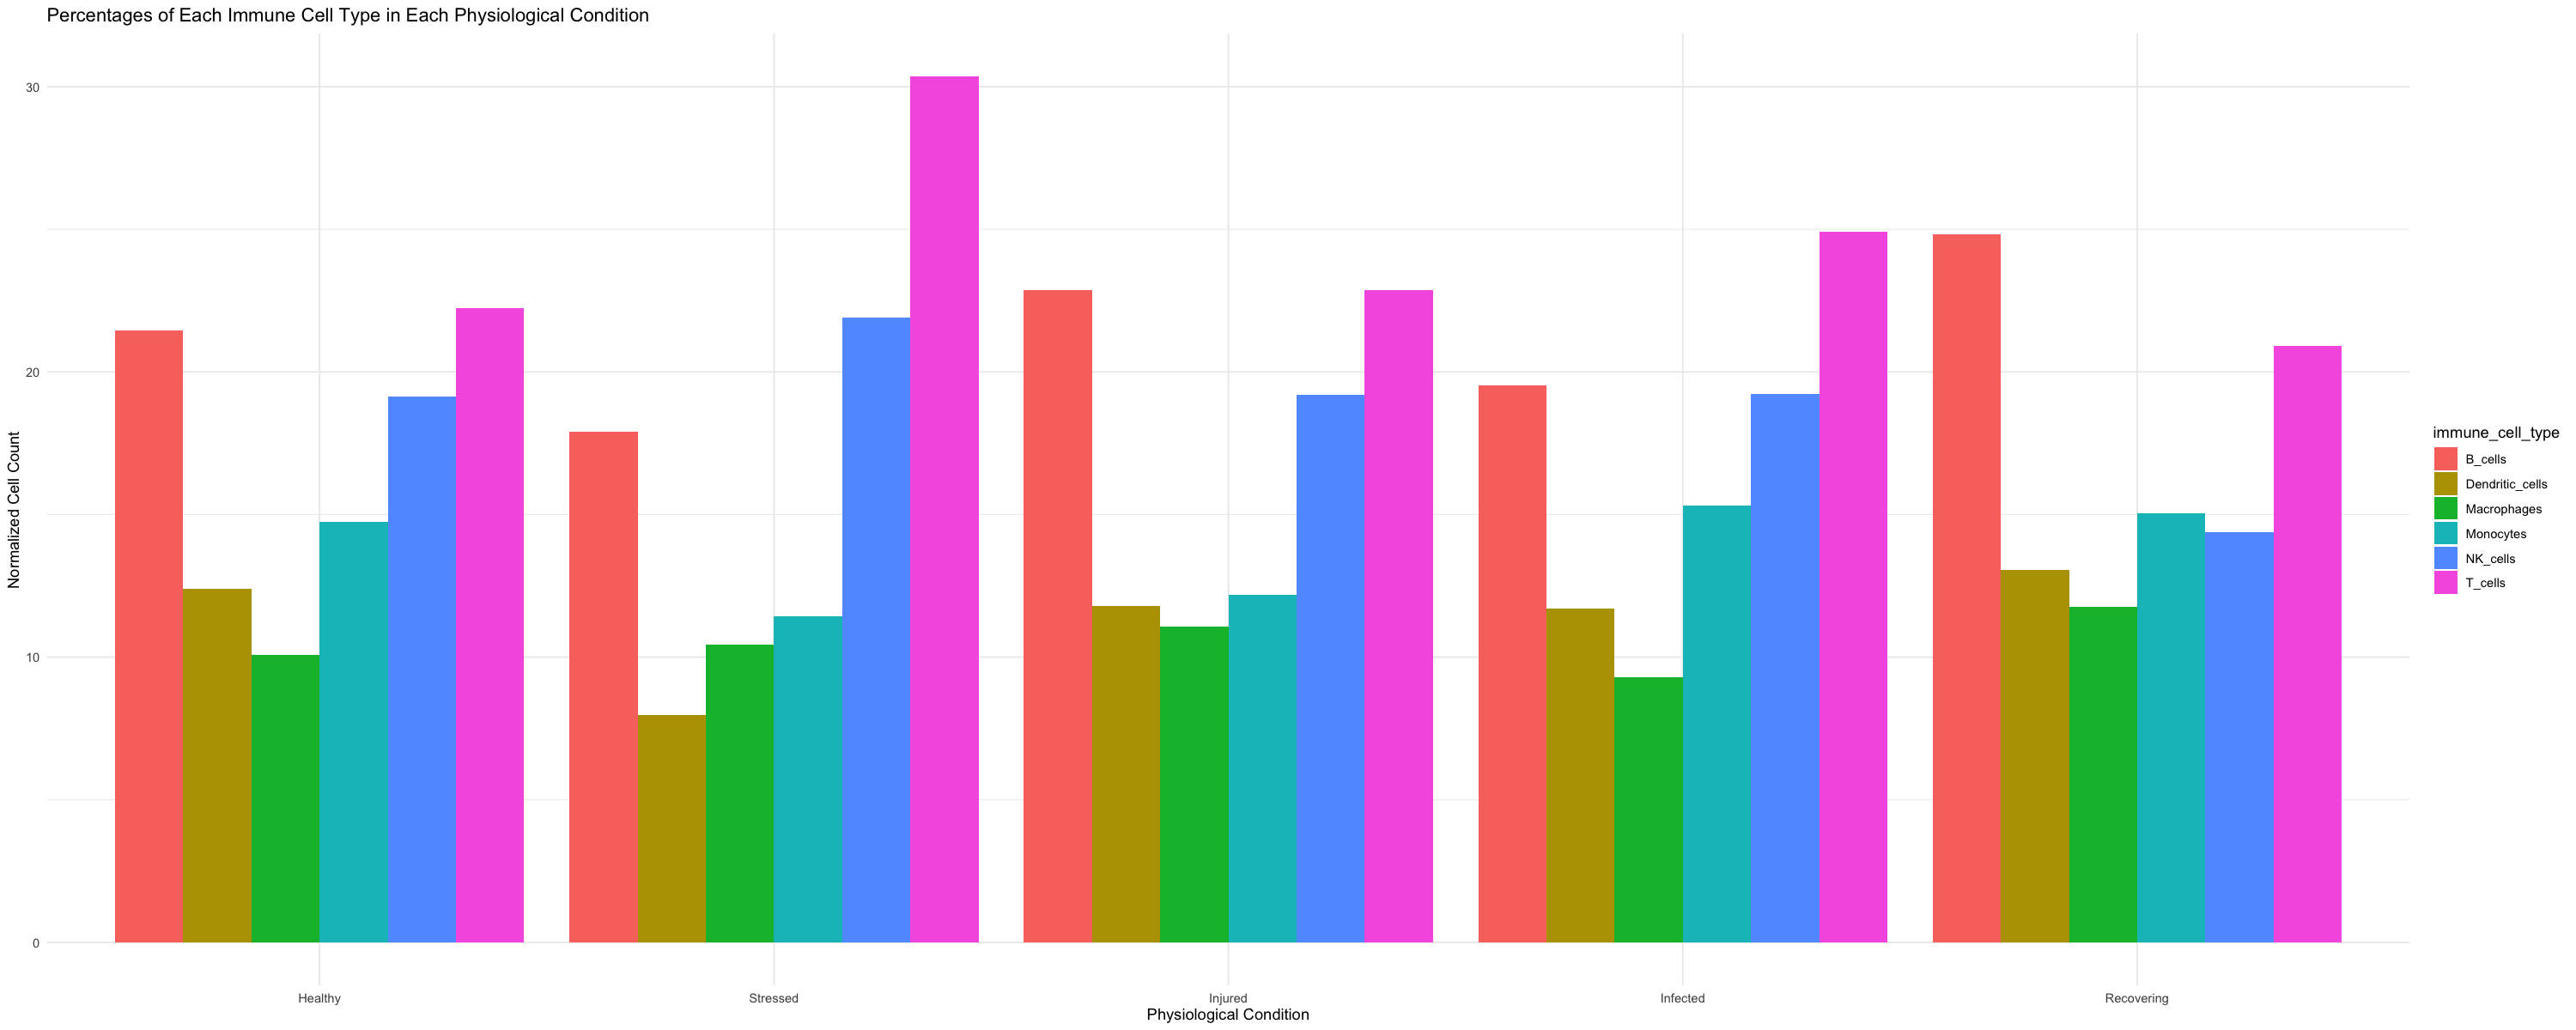

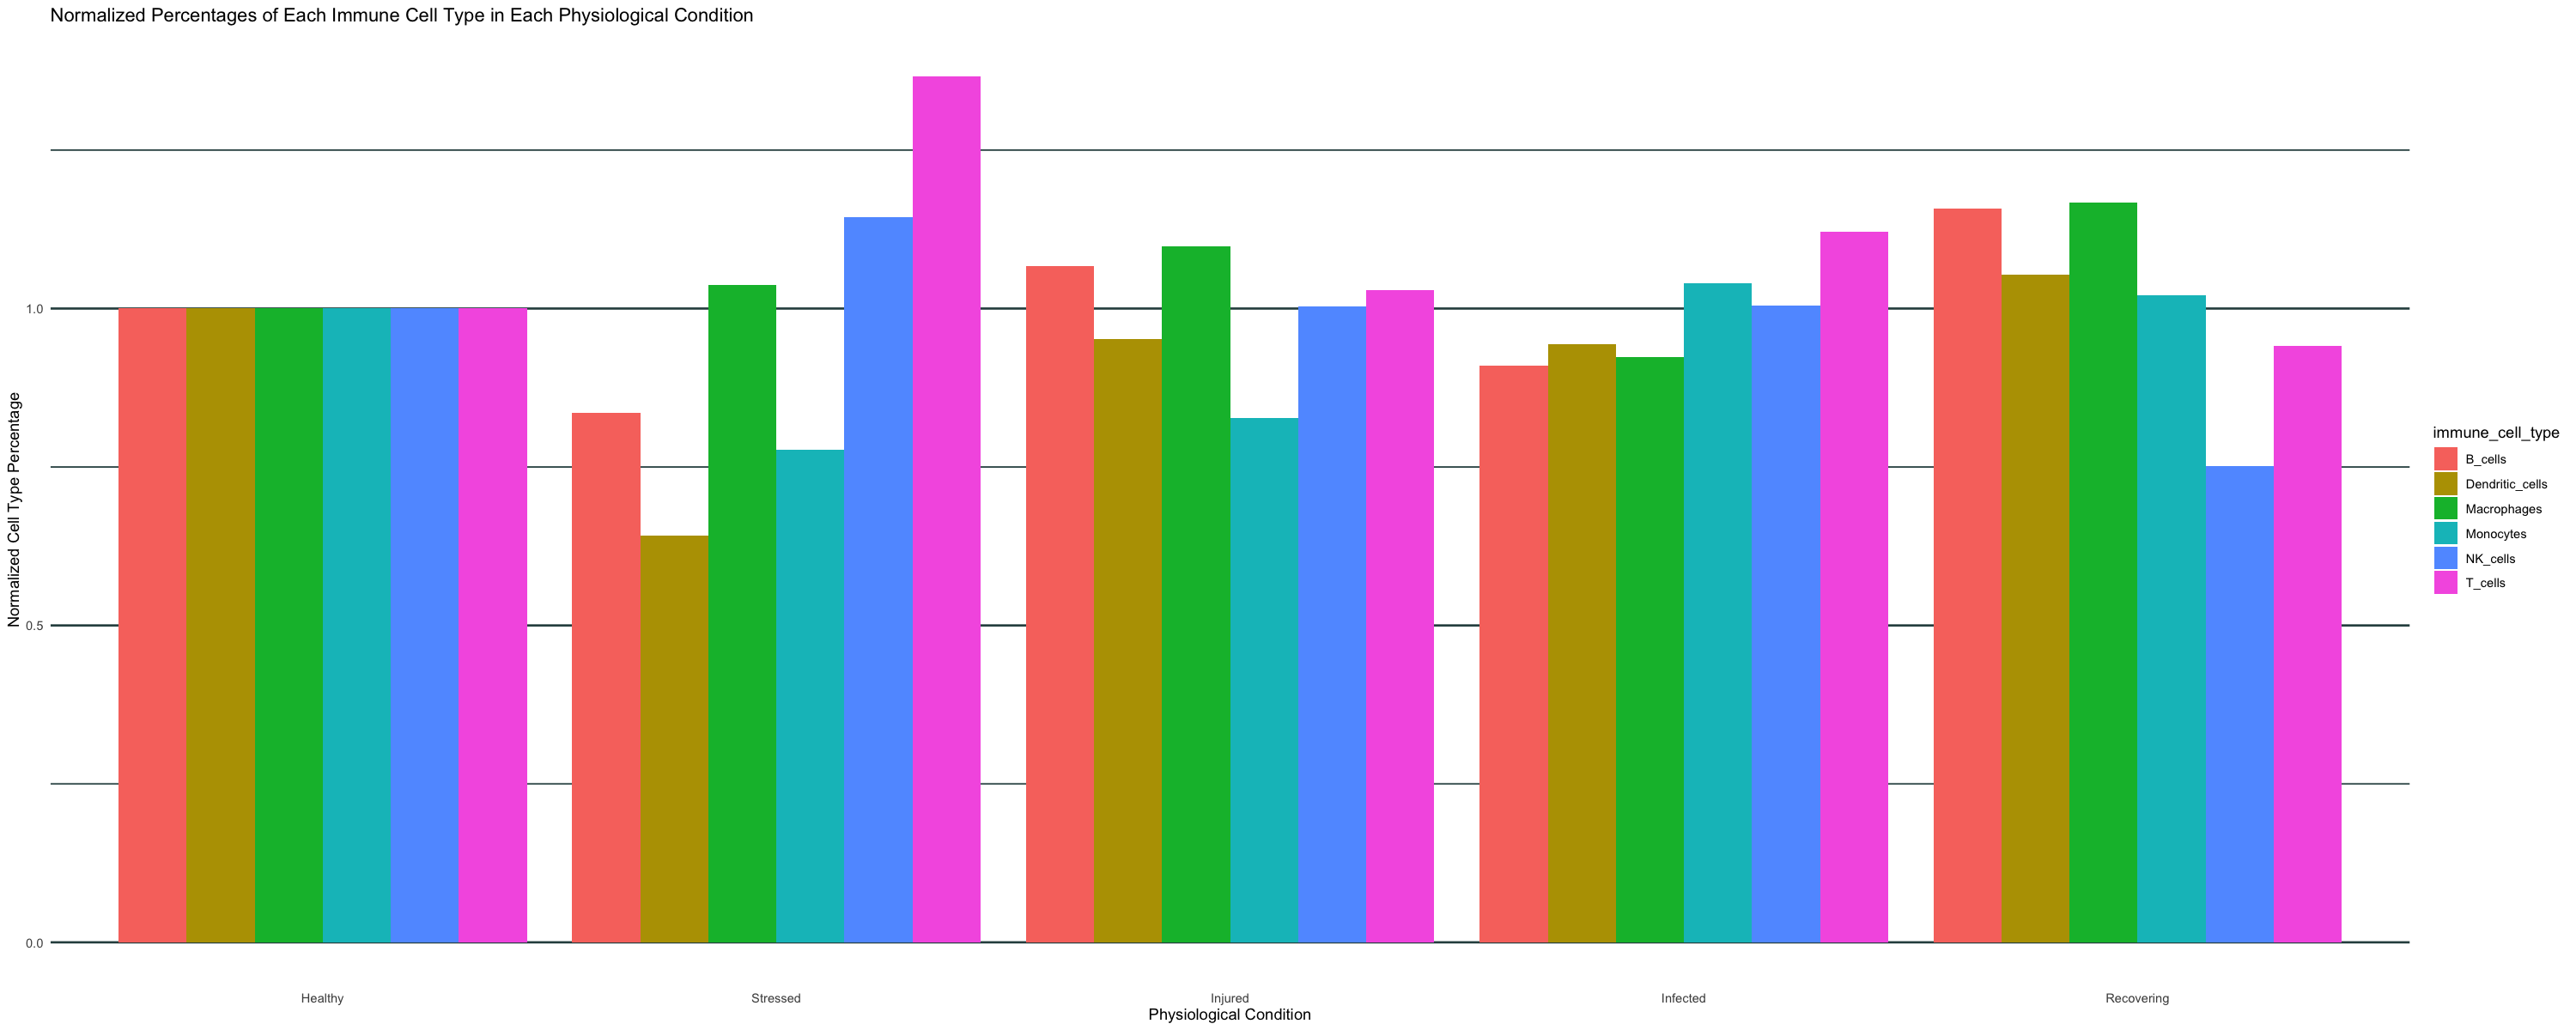

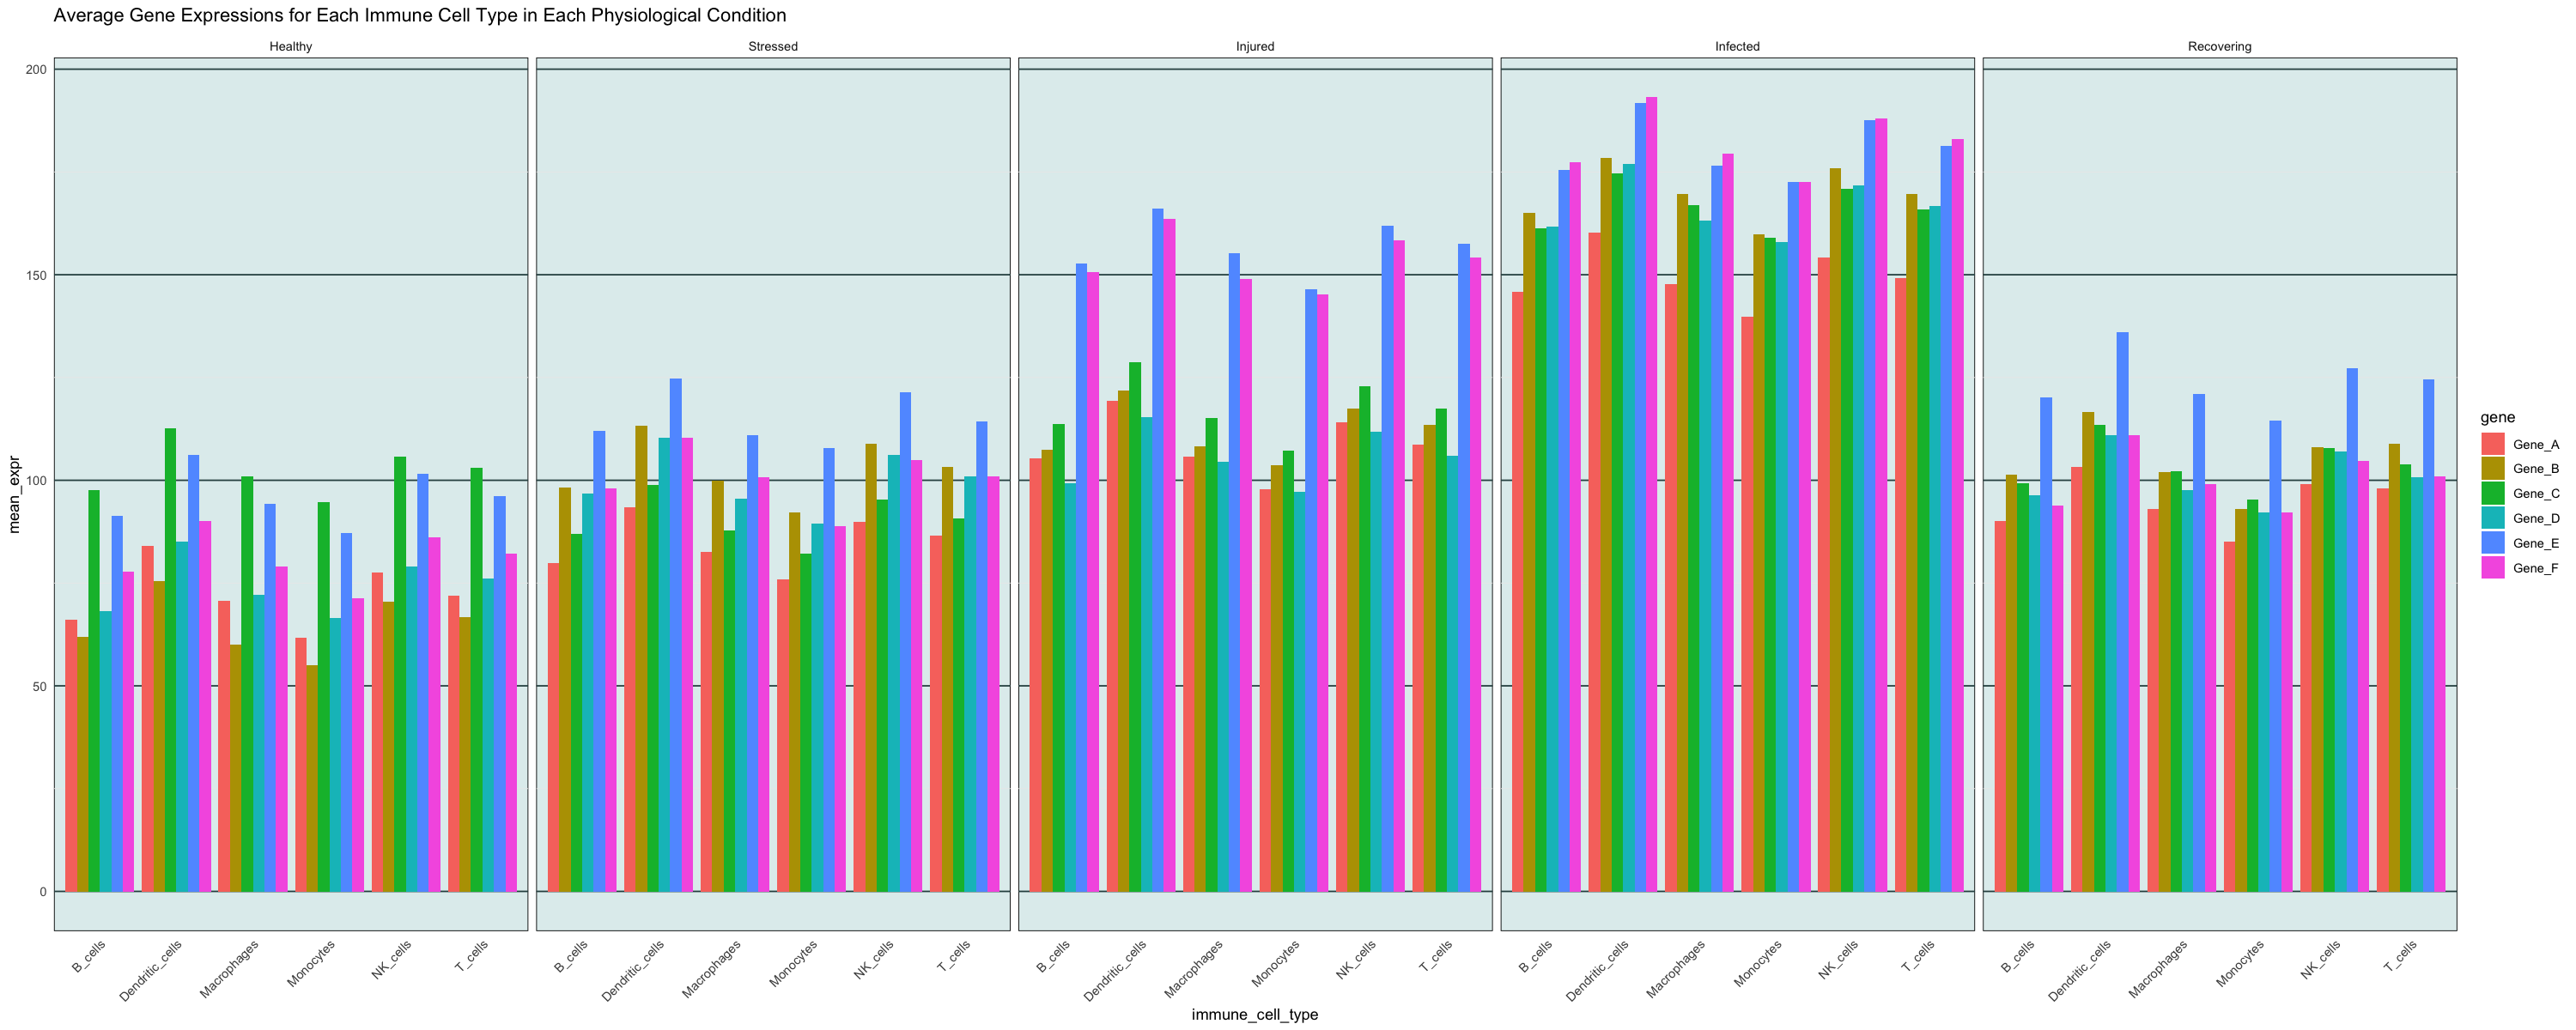

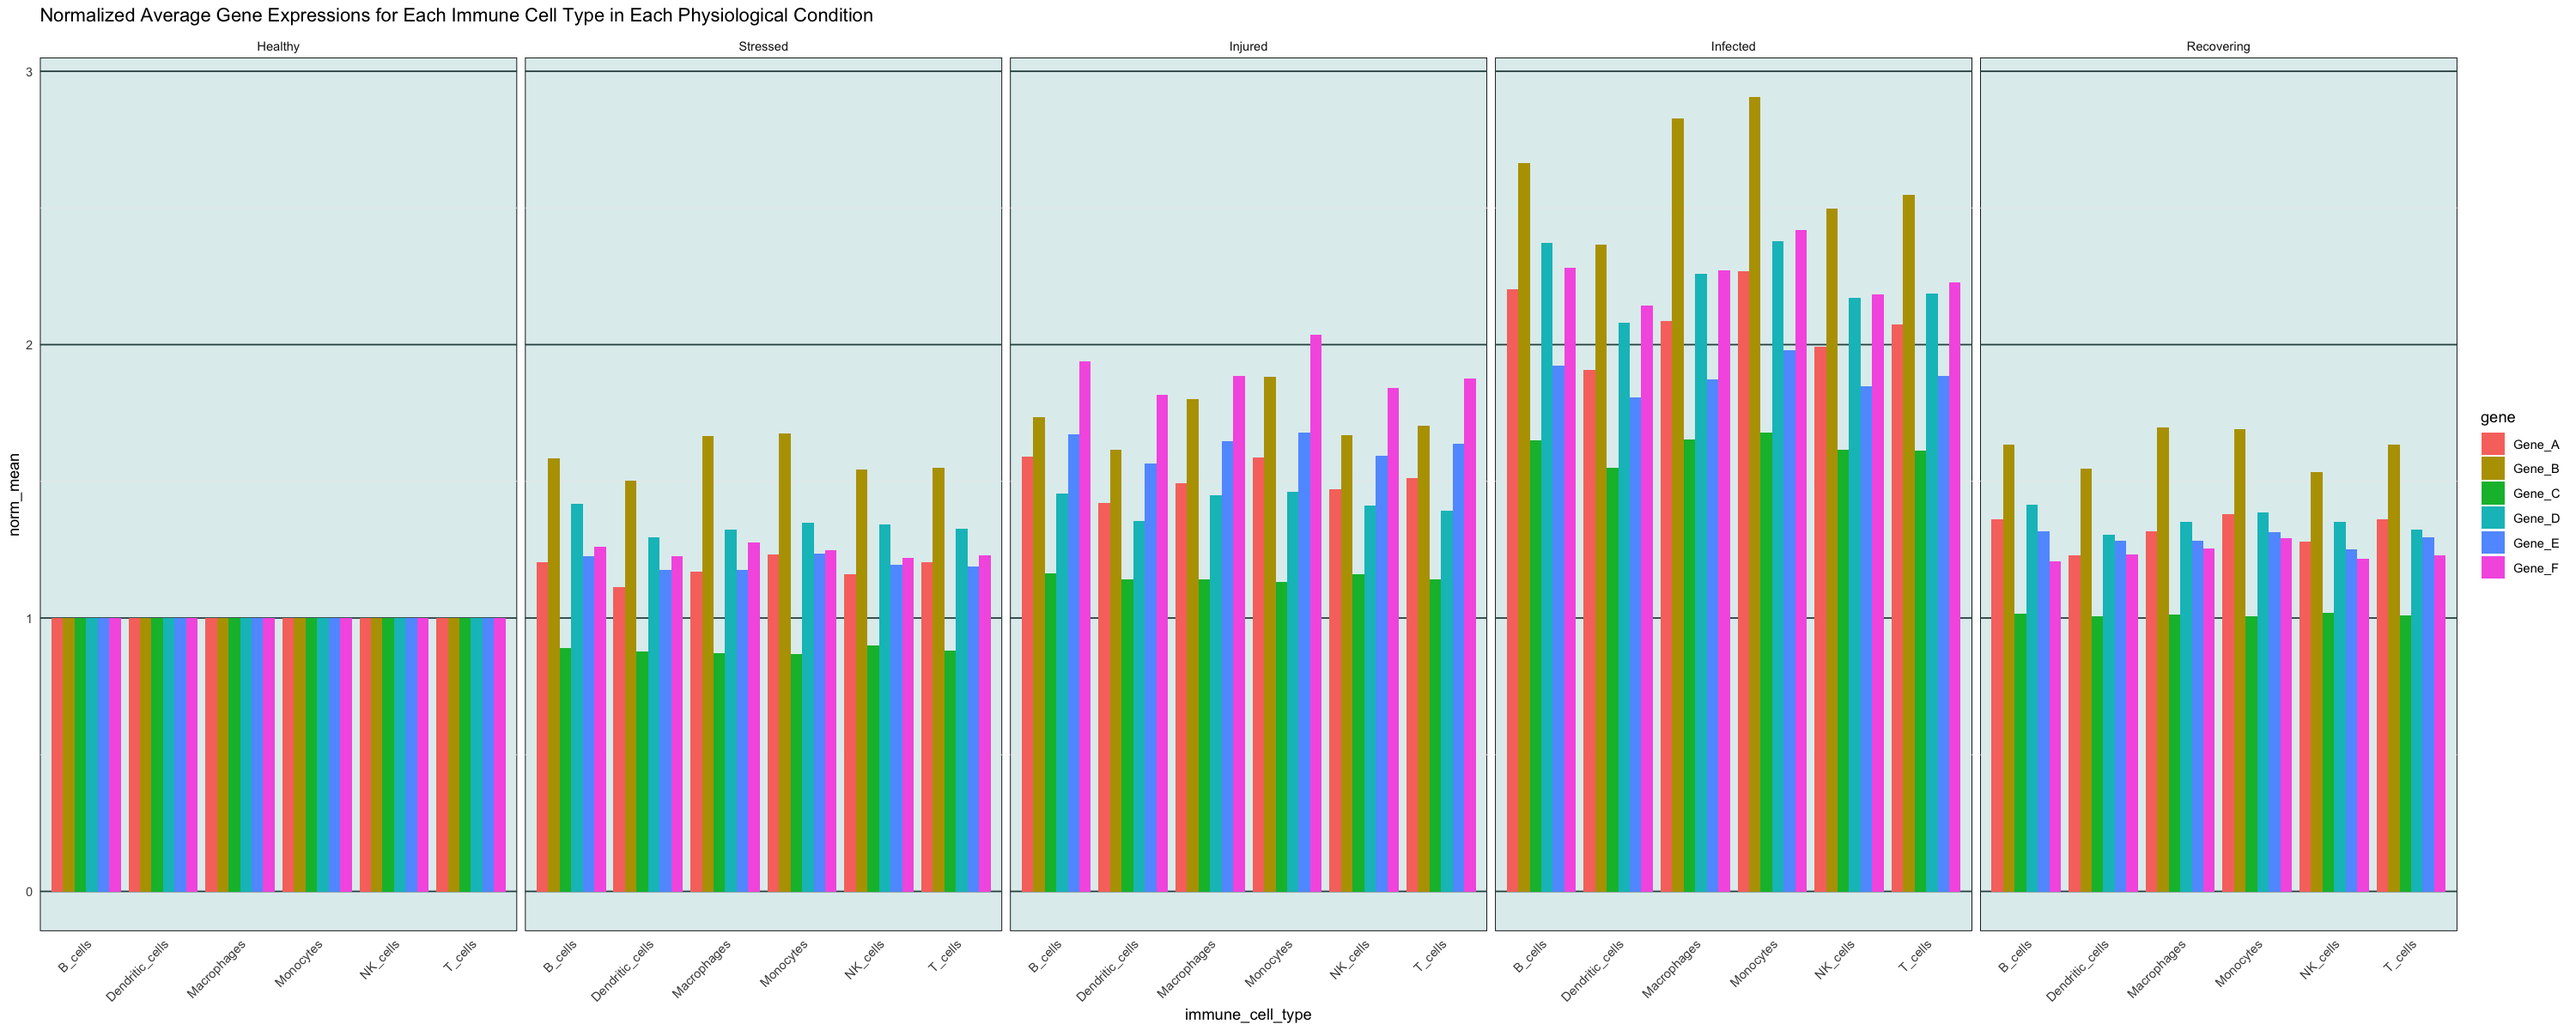

In [62]:
# plot percentages of each immune cell type in each physiological condition (side by side)
ggplot(cell_type_percentages, aes(x=physiological_condition, y=percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    ggtitle("Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count")

# plot percentages of cell types in each physiological conditions, categorized by 
ggplot(norm_cell_type_percentages, aes(x=physiological_condition, y=norm_percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    theme(
        panel.grid.major.y=element_line(color="darkslategray", size=0.75),
        panel.grid.minor.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Type Percentage")

# plot the average gene expression for each immune cell type in a physiological condition
ggplot(gene_expr_means, aes(x=immune_cell_type, y=mean_expr, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

# plot normalized means (side by side)
ggplot(norm_gene_expr_means, aes(x=immune_cell_type, y=norm_mean, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

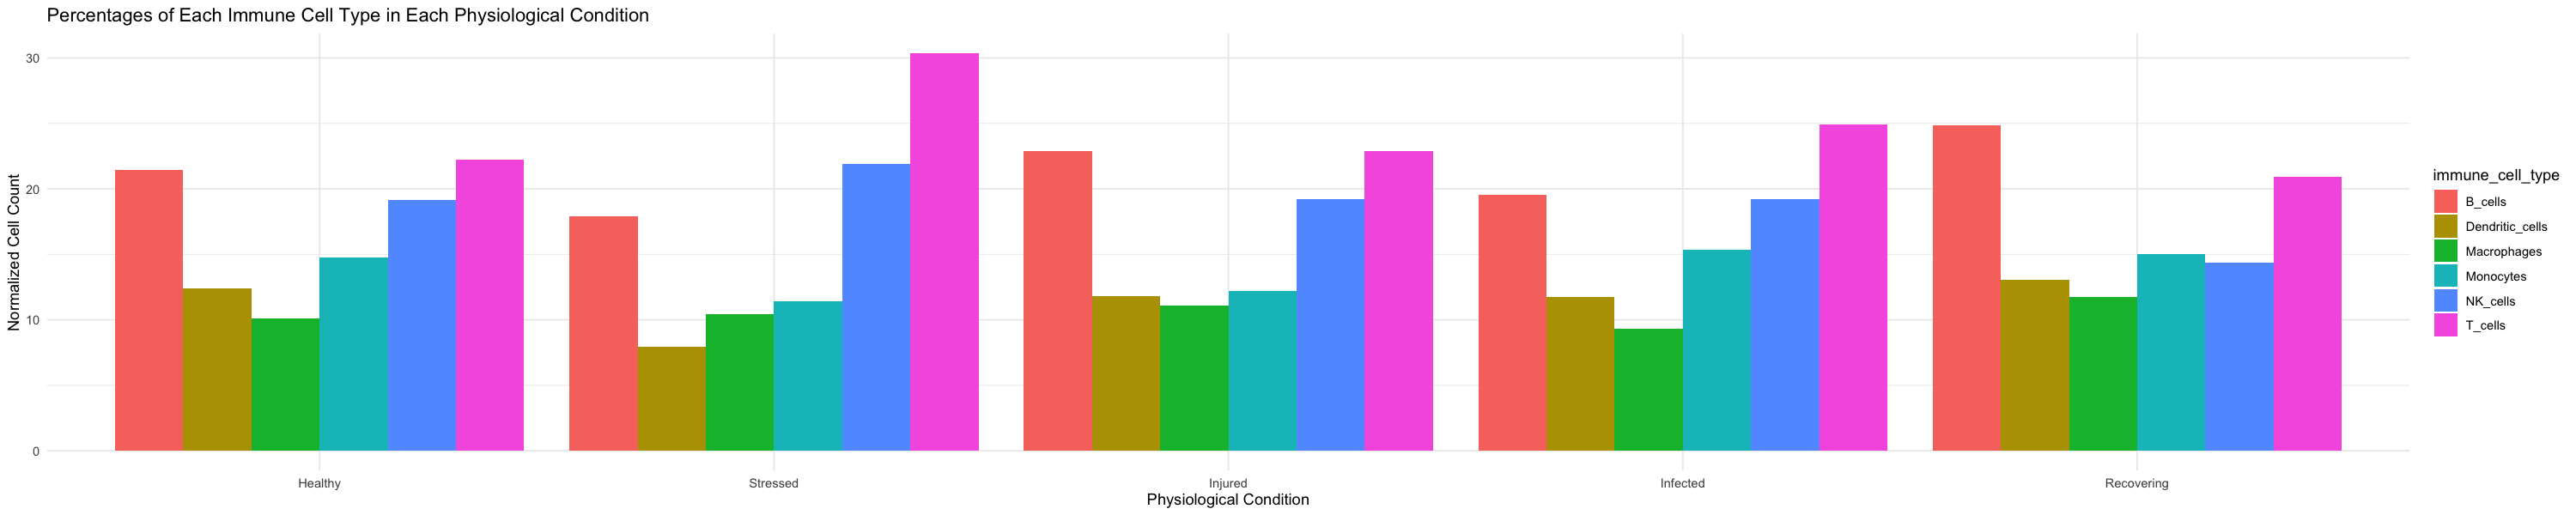

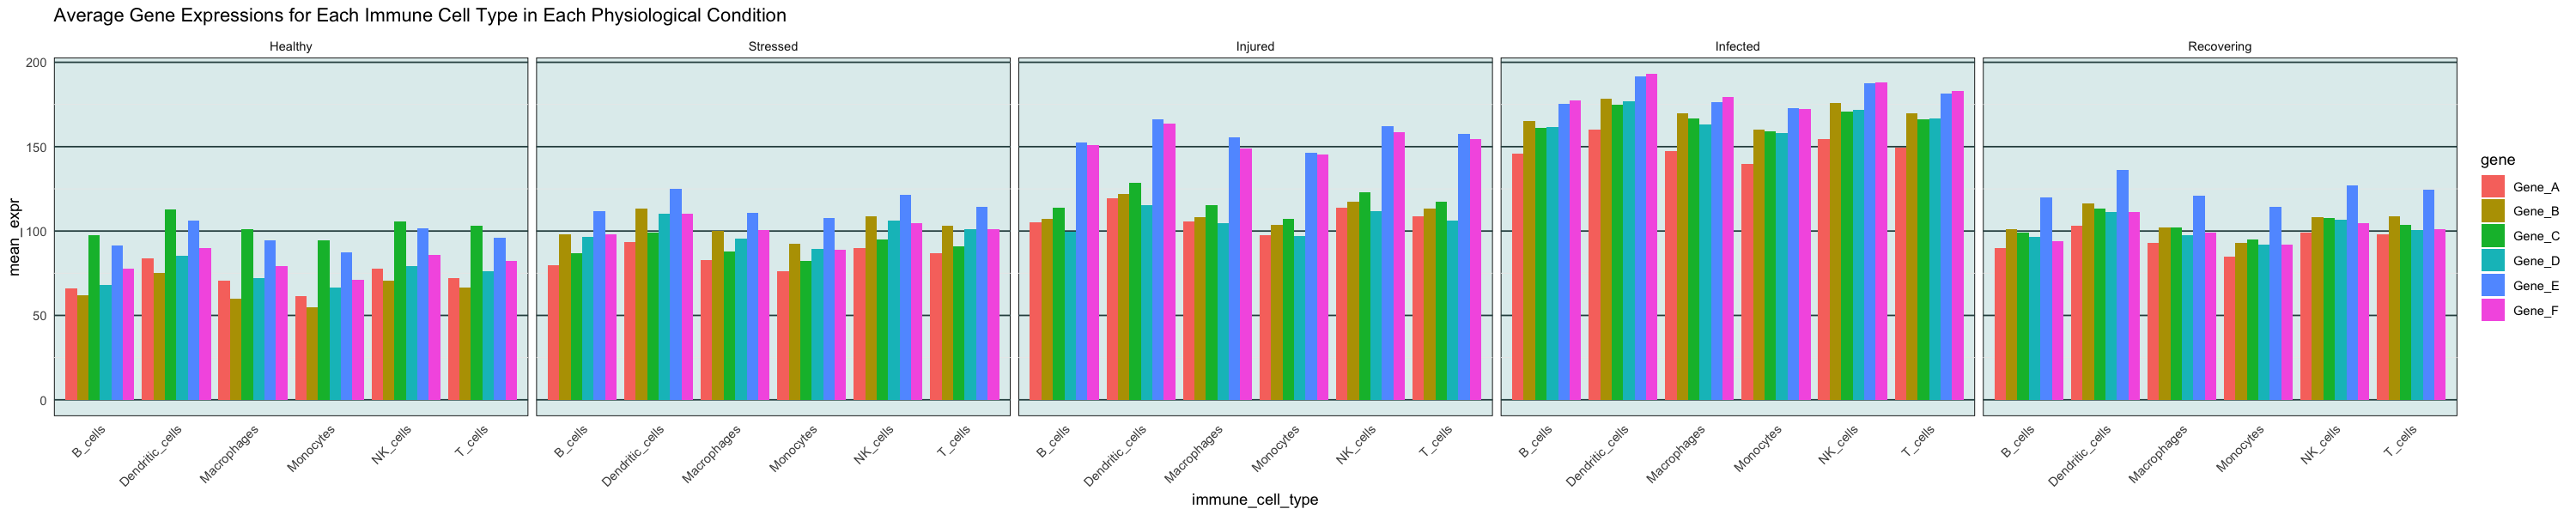

In [68]:
options(repr.plot.width=25, repr.plot.height=5)

# plot percentages of each immune cell type in each physiological condition (side by side)
ggplot(cell_type_percentages, aes(x=physiological_condition, y=percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    ggtitle("Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Count")

# plot the average gene expression for each immune cell type in a physiological condition
ggplot(gene_expr_means, aes(x=immune_cell_type, y=mean_expr, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

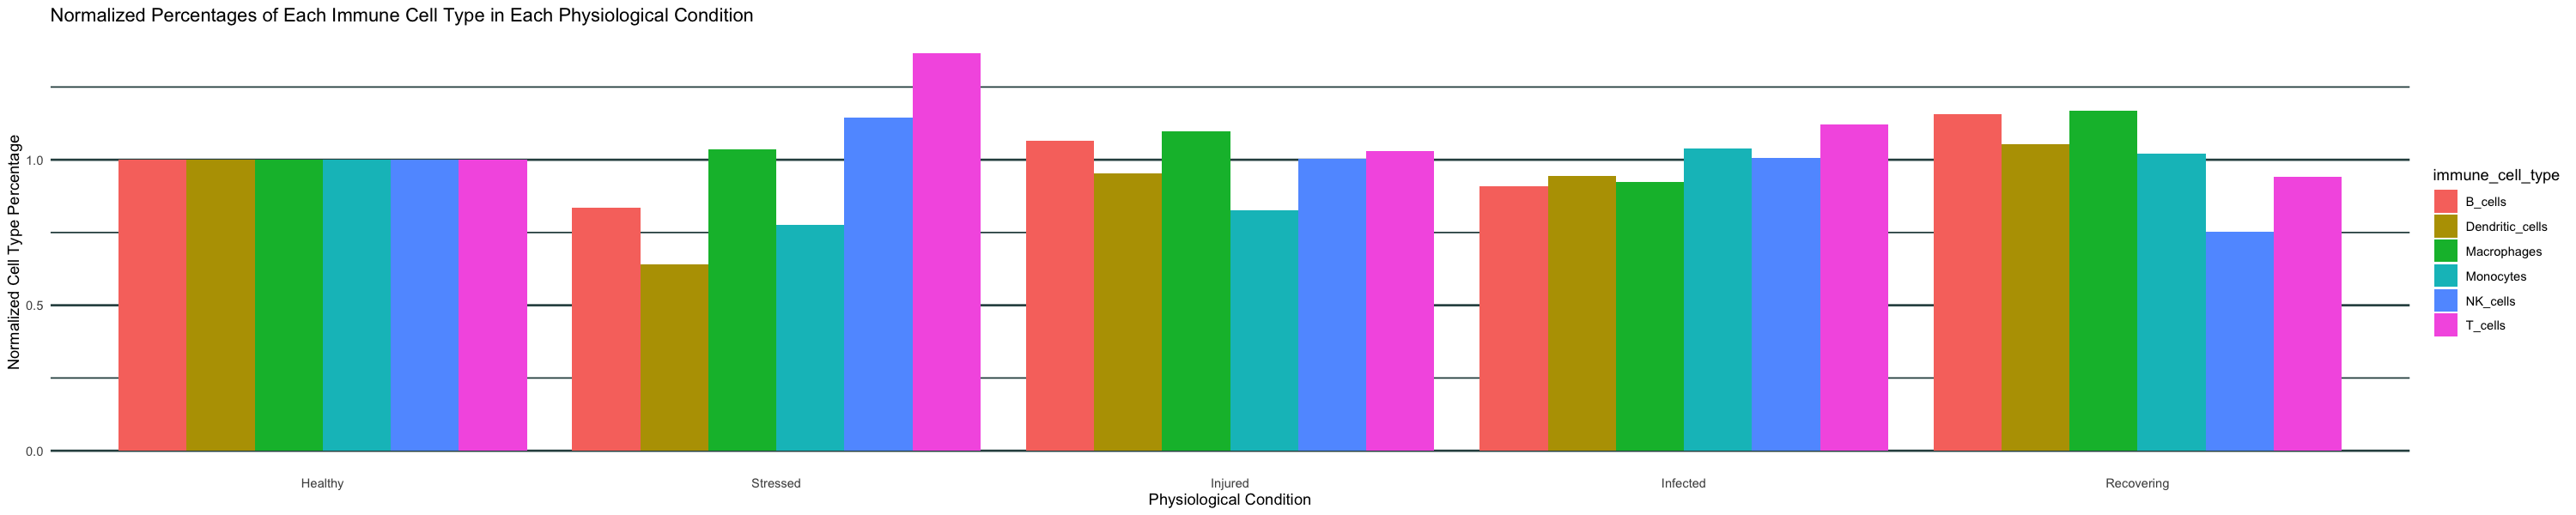

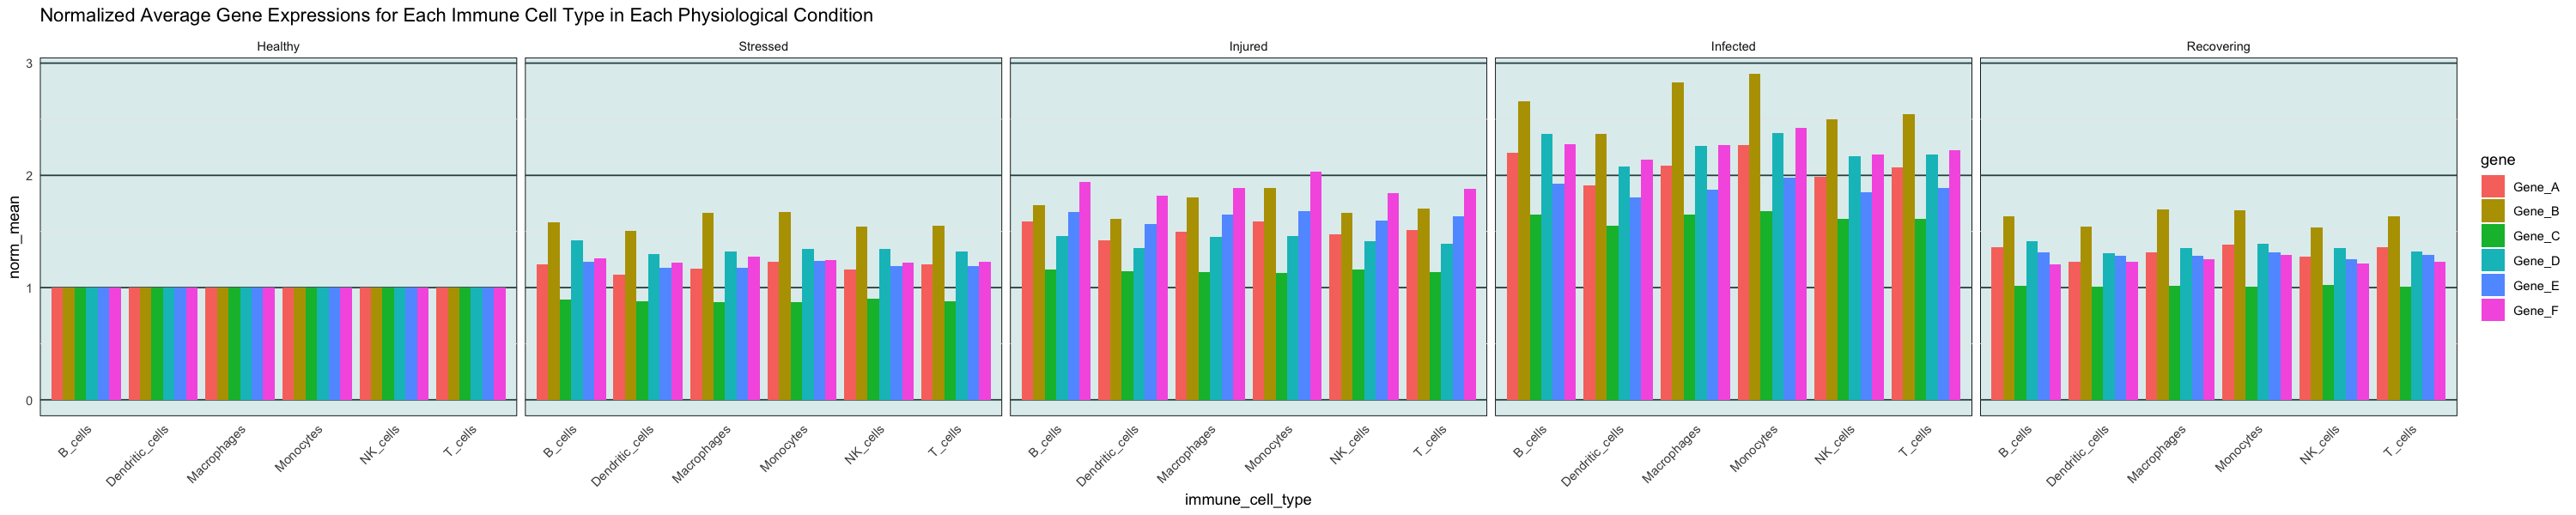

In [69]:
# plot percentages of cell types in each physiological conditions, categorized by 
ggplot(norm_cell_type_percentages, aes(x=physiological_condition, y=norm_percent, fill=immune_cell_type)) +
    geom_bar(stat="identity", position="dodge") +
    theme_minimal() +
    theme(
        panel.grid.major.y=element_line(color="darkslategray", size=0.75),
        panel.grid.minor.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Percentages of Each Immune Cell Type in Each Physiological Condition") +
    xlab("Physiological Condition") +
    ylab("Normalized Cell Type Percentage")

# plot normalized means (side by side)
ggplot(norm_gene_expr_means, aes(x=immune_cell_type, y=norm_mean, fill=gene)) +
    geom_bar(stat="identity", position="dodge") +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    theme(
        axis.text.x=element_text(angle=45, hjust=1),
        panel.background=element_rect(fill="azure2"),
        panel.grid.major.y=element_line(color="darkslategray", size=0.5),
        panel.grid.major.x=element_line(size=0)
    ) +
    ggtitle("Normalized Average Gene Expressions for Each Immune Cell Type in Each Physiological Condition")

### Finding Connections

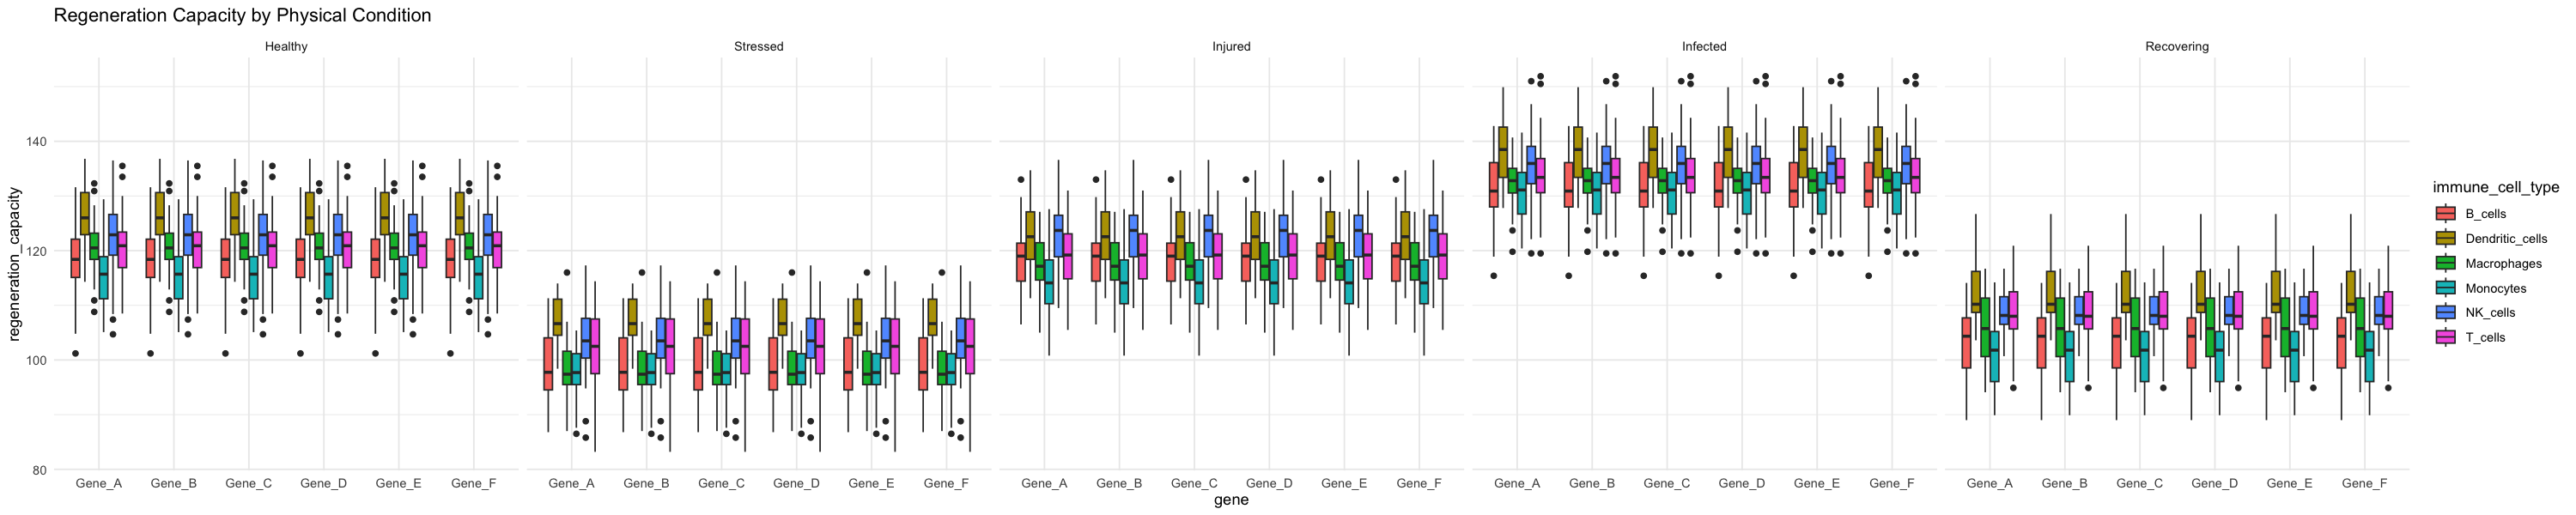

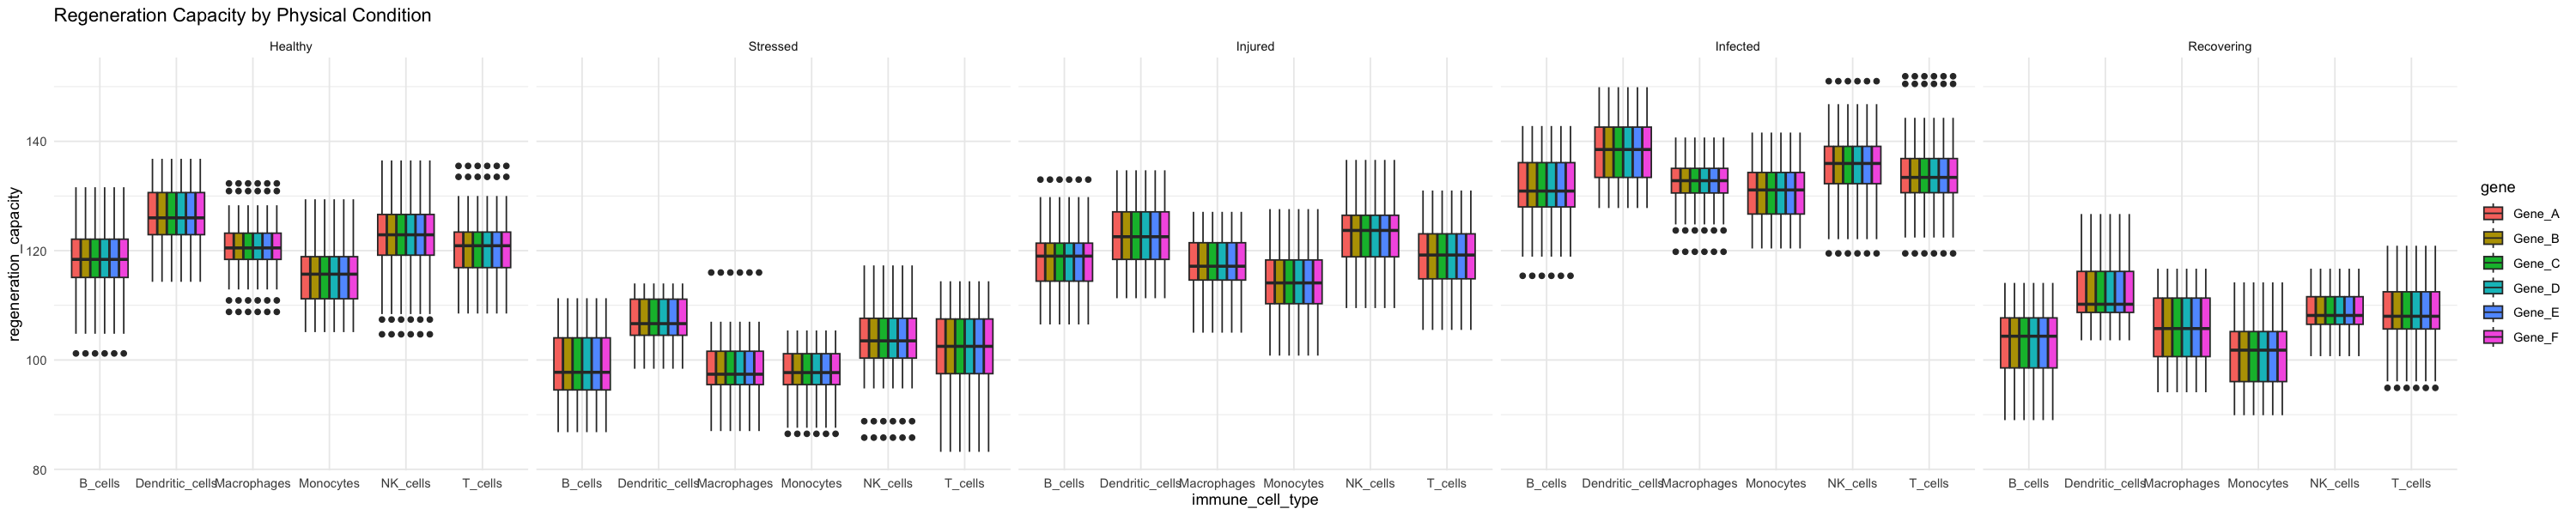

In [86]:
ggplot(sharks_gene_expr_split, aes(x=gene, y=regeneration_capacity, fill=immune_cell_type)) +
    geom_boxplot() +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    ggtitle("Regeneration Capacity by Physical Condition")

ggplot(sharks_gene_expr_split, aes(x=immune_cell_type, y=regeneration_capacity, fill=gene)) +
    geom_boxplot() +
    facet_grid(~ physiological_condition) +
    theme_minimal() +
    ggtitle("Regeneration Capacity by Physical Condition")

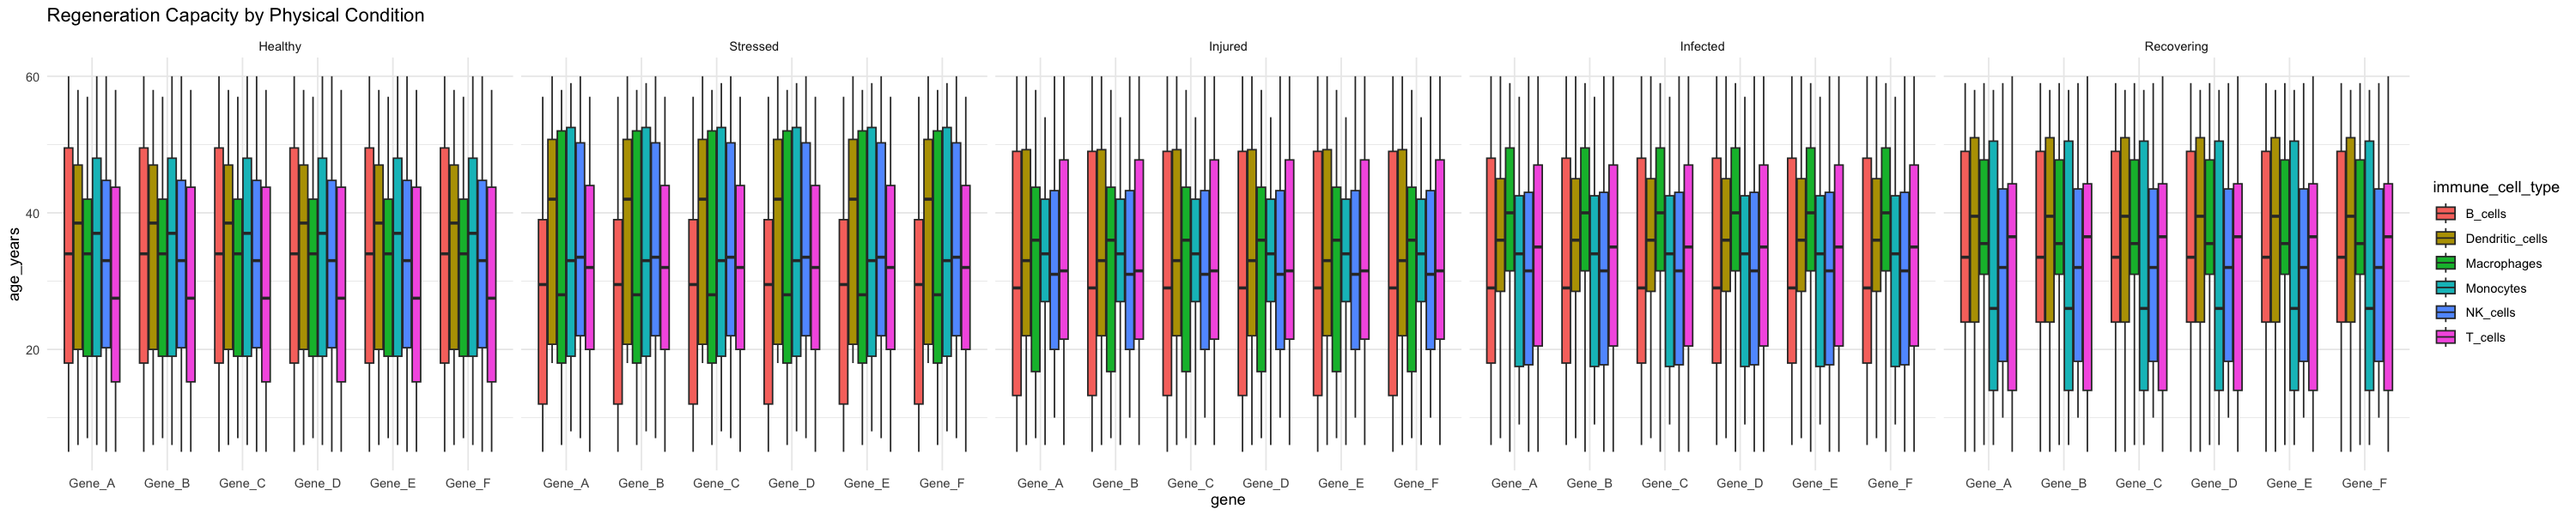